# Scraping

In [1]:
# Imports used for the code
import requests as req
from bs4 import BeautifulSoup as bs
import json
import time as t


# List of genres, the scraping goes genre by genre, which is faster than extracting the genre for each random game.

In [55]:
list_of_genres = [
    'Music',
    'Action-Adventure',
    'Adventure',
    'Education',
    'Fighting',
    'Misc',
    'MMO',
    'Party',
    'Platform',
    'Puzzle',
    'Racing',
    'Shooter',
    'Sandbox',
    'Sports',
    'Strategy',
    'Simulation',
    'Role-Playing',
    'Action'
]

In [4]:
def save_data(data, json_name):
    """
    This function handles the update of the databse json file.
    gets:
        data -  data which will be added to the json file
        json_name -  name of the file to which the data will be saved.
        
        returns the len of the database, for viewing the progress of the script.
    """
    
    #A JSON file is loaded and its contents are extracted.
    #Then, some new data is appended to the existing data in the JSON file.
    #Finally, the total length of the data in the JSON file is returned.
    
    
    json_data = []
    # Loading file and extracting data
    with open(json_name, 'r') as data_json:
        json_data = json.load(data_json)
    # Appending to the existing data
    json_data.append(data)
    # Writing to a file
    with open(json_name, 'w') as new_update:
        json.dump(json_data, new_update, indent=4)
    return len(json_data)


In [5]:
def load_page(genre, page_n):
    
    """ This function will try to load the page.
    if the page loads, it will return the HTML object
    else - will retry.
    gets: 
        genre - the genre which we scrape
        page_n - the page number
        (Both of these are used to format the link below).
    returns:
        when we get a valid response, we return the content of the HTML """
    
    url = f"https://www.vgchartz.com/games/games.php?page={page_n}&results=200 \
&genre={genre}&order=Sales&ownership=Both&direction=DESC&showtotalsales= \
1&shownasales=1&showpalsales=1&showjapansales=1&showothersales=1&showpublisher \
=0&showdeveloper=1&showreleasedate=1&showlastupdate=0& \
showvgchartzscore=0&showcriticscore=0&showuserscore=0&showshipped=1"
    response = req.get(url)
    if response.status_code == 200 and "503 Service Unavailable" not in str(response.content):
        print(f'{response.status_code} | Connected!')
        return response.content
    else:
        print(
            f'{response.status_code} - Could not connect...Reconnecting in 15 seconds...')
        t.sleep(15)
        return load_page(genre, page_n)
    return response.content

# Scraping function

In [7]:
def extract_items(genre, html_object):
    
"""" The function below is responsible for extracting the content of the webpage obtained from the preceding function "load.page".
Once all the games on the page have been scraped, the data is sent to a saving function for storage.
The function takes the following inputs:

Genre: Data to be included in the JSON file.
HTML_object: The HTML content obtained from the preceding function "load.page".

The function returns an error if the number of rows on a page is less than 5.
This threshold accounts for the header and a few irrelevant div elements on the page.
If there are fewer than 5 items on a page, it indicates that the page contains no relevant
data for the given genre, signifying the completion of processing for that genre. """

# Initialization of variables amount and games_from_page.

# The bs function from the BeautifulSoup library is used to create a BeautifulSoup object called soup,
#which parses the html_object using the "html.parser" parser.


    try: 
        amount = 0
        games_from_page = []
        soup = bs(html_object, "html.parser")
        table_of_games = soup.find('div', id='generalBody').find_all('tr')  #go to general body, take all tr,  &&  assign to table_of_games 
        if len(table_of_games) > 5: #if there are less than 5 rows --> not a single game on page --> skip row.
            del table_of_games[:3]
            del table_of_games[-1]
            for game in table_of_games:
                row = game.find_all('td')# Find all 'td' elements within the current 'tr' element and assign them to 'row'
                game_record = {'name': row[2].text,     #פילוח
                               'developer': row[4].text,
                               'platform': row[3].find('img')['alt'],
                               'genre': genre,
                               'total_shipments': row[5].text,
                               'total_sales': row[6].text,
                               'na_sales': row[7].text,
                               'pal_sales': row[8].text,
                               'japan_sales': row[9].text,
                               'other_sales': row[10].text,
                               'release': row[11].text
                               }
                amount = save_data(game_record, "database.json")
            print(f'Collected: {amount}')
            return True
        else:
            return False
    except Exception as e:
        return False

In [ ]:
# After the script is done, we can save the data using this function:
def convert_from_json_to_csv(json_file, output_name):
    json_data = pd.read_json(json_file)
    json_data.to_csv(f"{output_name}.csv") #Conversion
    time.sleep(3) #The delay allows some time for the file to be fully written and closed before reading it.
    read_csv = pd.read_csv(f"{output_name}.csv") #Assigns the resulting DataFrame to the variable "read_csv".
    read_csv.dropna(thresh=2, axis=0)#Removes any rows from the read_csv DataFrame that contain at least 2 missing values (N/A) using the dropna function from pandas.
    read_csv.to_csv(f'{output_name}_clean.csv') #Save the file as "***_clean.csv"

In [ ]:
# Main code, runs per each genre, and activates the code parts on each data item.
data = []
counter = 0
games_counter = 0
for genre in list_of_genres:
    for page in range(45): # 50 - 5 non helpful rows = 45 games per page
        counter += 1
        data = load_page(genre, page) # Load the page data for the given genre and page
        status = extract_items(genre, data) # Extract items from the loaded page
        if not status:
            break
        else:
            games_counter += 200
            print(
                f'TOTAL: {counter}/{14*len(list_of_genres)}/ Genre:{genre}')
convert_from_json_to_csv('database.json','database.csv')

#For example:
#if counter is 5,   len(list_of_genres) is 3,   and genre is "Action",
#the line would be printed as:   " TOTAL: 5/42/ Genre: Action "

200 | Connected!


# Functions statements

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Load and cleaning the dataset 

In [13]:
raw_data = pd.read_csv("raw_data.csv")
raw_data.drop(['Unnamed: 0','total_shipments'],axis='columns',inplace=True)
raw_data['release'] = raw_data['release'].replace(r'N/A ',np.NaN,regex=True)
raw_data.head(15)

,name,developer,platform,genre,total_sales,na_sales,pal_sales,japan_sales,other_sales,release
0,God of War,SIE Santa Monica Studio,Series,Action,NaN,NaN,NaN,NaN,NaN,22nd Mar 05
1,Warriors,Omega Force,Series,Action,NaN,NaN,NaN,NaN,NaN,30th Jun 97
2,Devil May Cry,Capcom,Series,Action,NaN,NaN,NaN,NaN,NaN,16th Oct 01
3,God of War (2018),SIE Santa Monica Studio,All,Action,NaN,NaN,NaN,NaN,NaN,20th Apr 18
4,Dynasty Warriors,Omega Force,Series,Action,NaN,NaN,NaN,NaN,NaN,30th Jun 97
5,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,20.32m,6.37m,9.85m,0.99m,3.12m,17th Sep 13
6,Frogger,Konami,Series,Action,NaN,NaN,NaN,NaN,NaN,23rd Oct 81
7,God of War (2018) Read the review,SIE Santa Monica Studio,PS4,Action,NaN,NaN,NaN,NaN,NaN,20th Apr 18
8,Grand Theft Auto V,Rockstar North,PS4,Action,19.39m,6.06m,9.71m,0.60m,3.02m,18th Nov 14
9,Grand Theft Auto: San Andreas,Rockstar North,PS2,Action,NaN,NaN,NaN,NaN,NaN,26th Oct 04


In [6]:
clean_data = raw_data.dropna(subset=['total_sales'], inplace=False)
#Drop any rows from raw_data where 'total_sales' column has missing values, N/A.


clean_data['release'] = pd.to_datetime(clean_data['release']).dt.date #Convert to datetime format.
#.dt.date accessor is then used to extract only the date part from the datetime values.
# YYYY-MM-DD HH:MM:SS --> YYYY-MM-DD


clean_data = clean_data.fillna(0)
#fills any remaining missing values in the clean_data DataFrame with zero (0) using the fillna method.


sales_dic=['total_sales','na_sales','pal_sales','japan_sales','other_sales']

for sale in sales_dic:
    clean_data[sale] = clean_data[sale].replace('m','',regex=True).replace(0.00,0.01)
    
clean_data.rename(columns = {'pal_sales' : 'eu_sales'}, inplace = True)


clean_data['release_year'] = clean_data['release'].astype(str).str[:4] #extract only the YEAR
# YYYY-MM-DD --> YYYY
clean_data.drop(['release'],axis='columns',inplace=True)


clean_data = clean_data.drop_duplicates(subset=['name','platform'])
#This line removes duplicate rows from the clean_data DataFrame based on the combination
#of name' and 'platform' columns using the drop_duplicates method.
#Only the first occurrence of each unique combination is kept, and subsequent duplicates are dropped.

clean_data = clean_data.reset_index(drop=True) #Reset index to starting point.
clean_data.to_csv("games_df.csv")
display(clean_data)

,name,developer,platform,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales,release_year
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,20.32,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Rockstar North,PS4,Action,19.39,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,16.15,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Rockstar North,X360,Action,15.86,9.06,5.33,0.06,1.42,2013
4,Grand Theft Auto III,DMA Design,PS2,Action,13.10,6.99,4.51,0.30,1.30,2001
...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.00,0.01,0.01,0.00,0.01,2013


# Visualizations

# Video Game Sales - Exploratory data analysis (EDA)

## Questions for Analysis
* Who are the top 10 best selling developers?
* What are some of the differences between the Sales Markets?
* What dummy variables can we create?
* How can we view relative sales?

# Function Statements

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'],axis =1 ,inplace = True)
print ("Shape of Dataframe: " + str(df.shape))
df

Shape of Dataframe: (18919, 10)


,name,developer,platform,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales,release_year
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,20.32,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Rockstar North,PS4,Action,19.39,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,16.15,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Rockstar North,X360,Action,15.86,9.06,5.33,0.06,1.42,2013
4,Grand Theft Auto III,DMA Design,PS2,Action,13.10,6.99,4.51,0.30,1.30,2001
...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.00,0.01,0.01,0.00,0.01,2013


## Univariate Analysis
#### Let's check our platforms and see how well they've been selling.

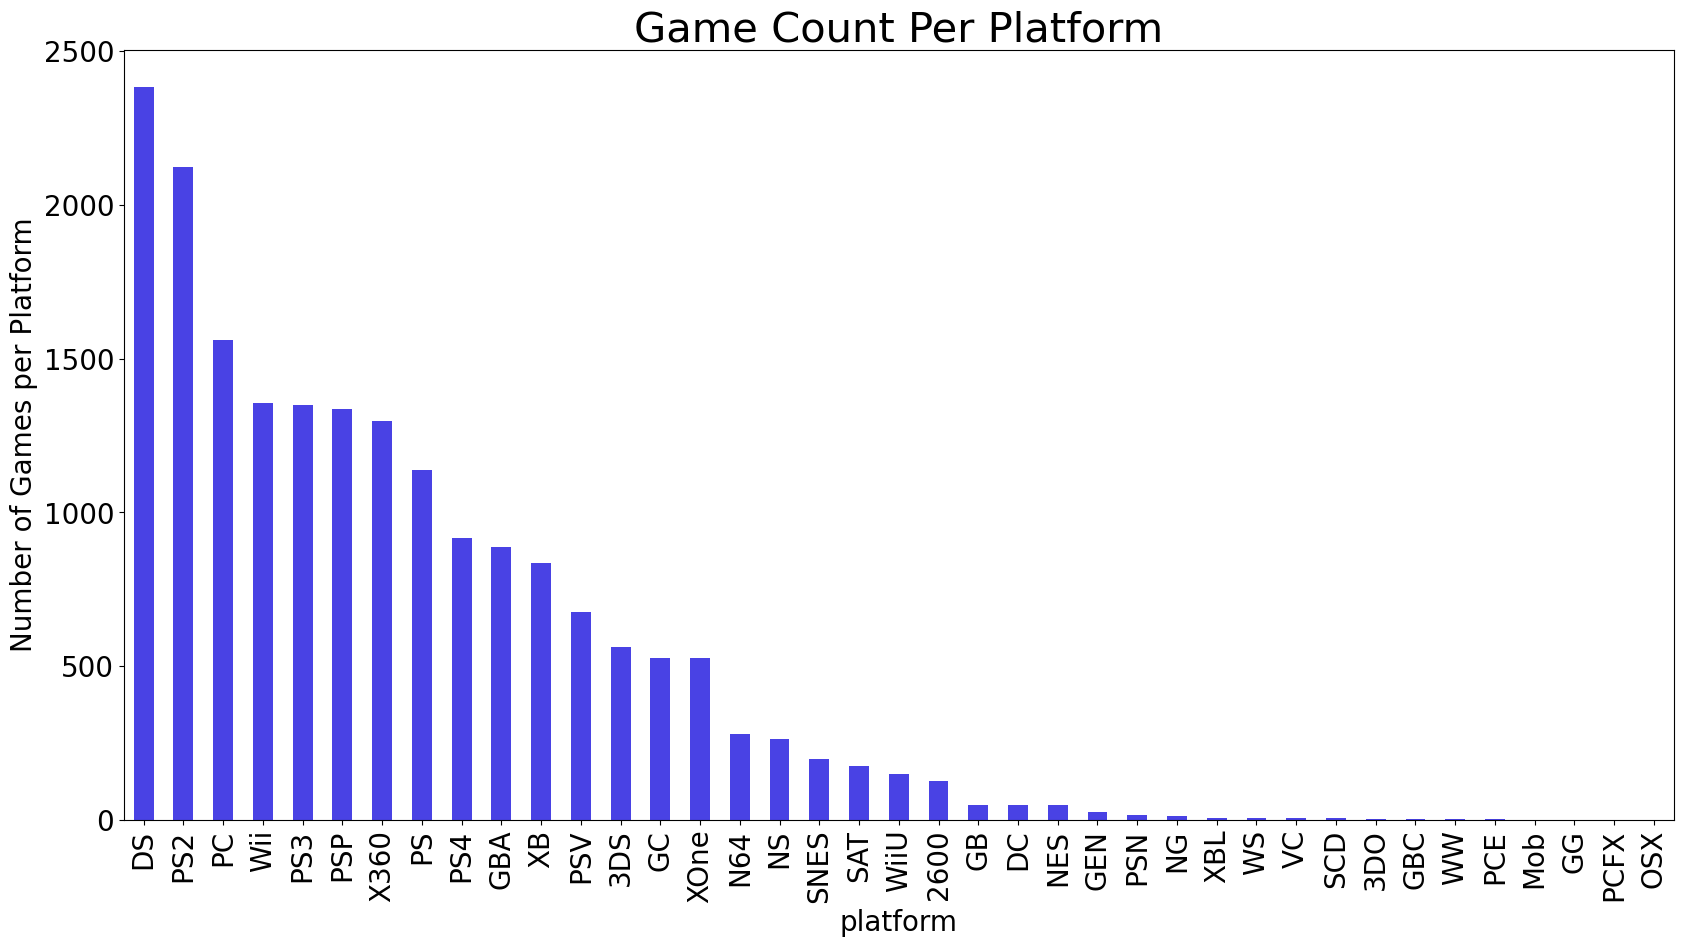

In [5]:
ax9 = df['platform'].value_counts().plot.bar(color='#4942E4', fontsize=20, title='Game Count Per Platform', figsize=(20,10))

ax9.set_ylabel("Number of Games per Platform",fontsize=20)
ax9.set_xlabel("platform",fontsize=20)
ax9.title.set_size(30)
plt.show()

The plot above shows how many games per platform our data contains. All platforms will be generalized to 3 platform types: handhelds, consoles, and PC.

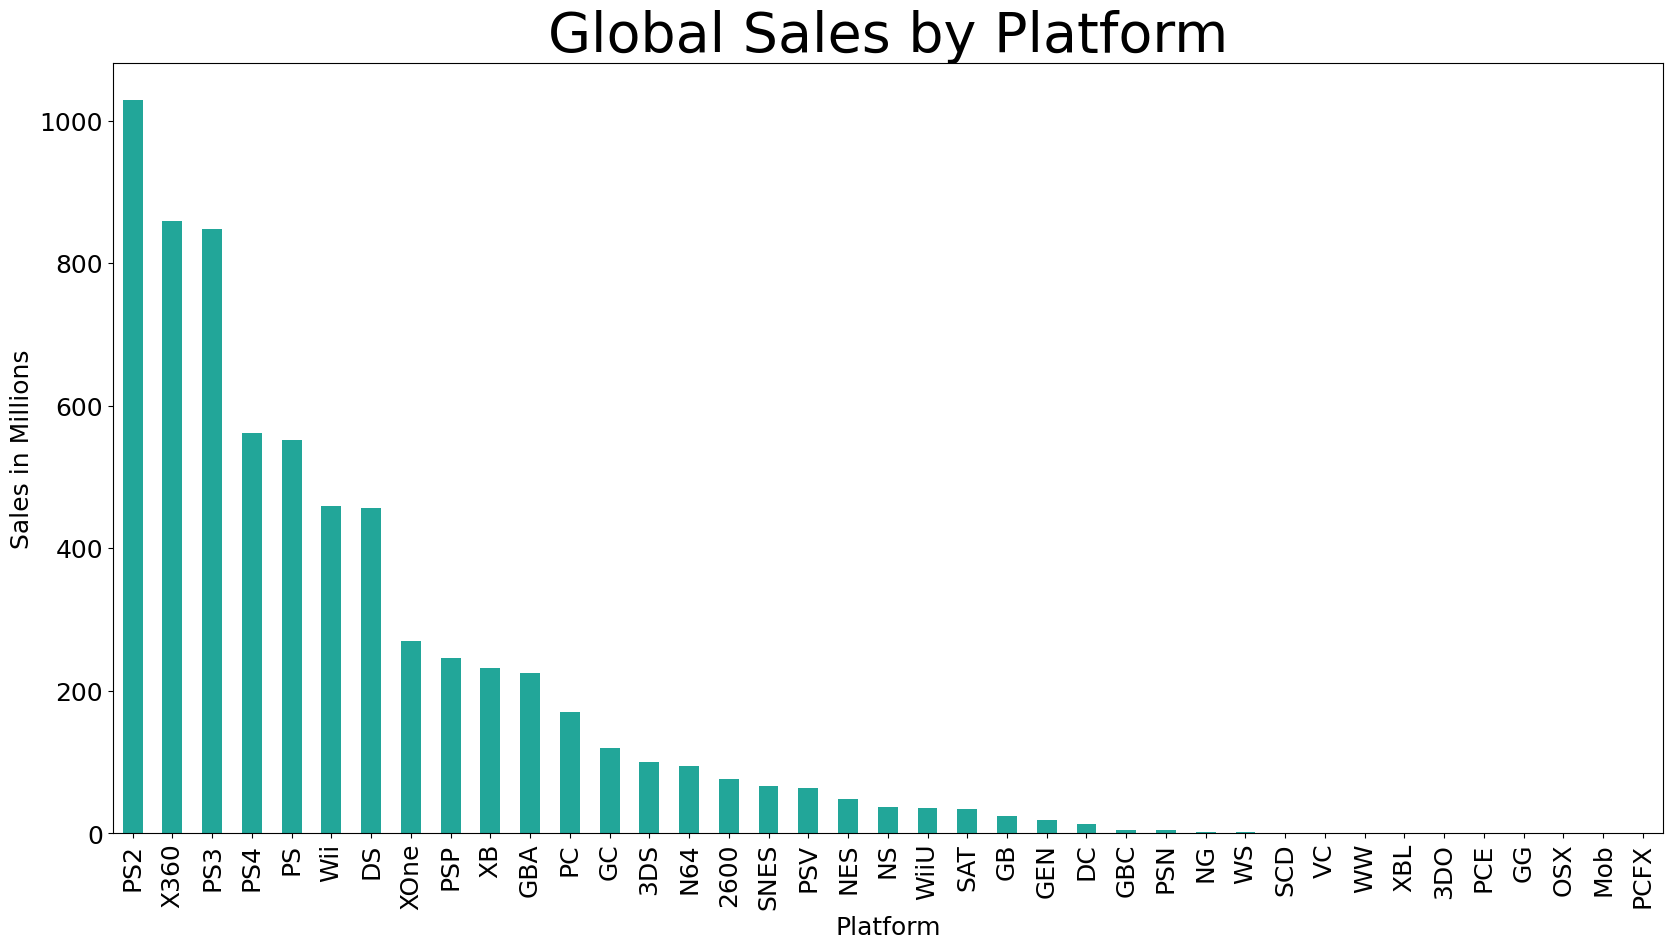

In [6]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

platform_sales = df.groupby("platform").sum()["total_sales"]
sorted_platform_sales = platform_sales.sort_values(ascending=False)  # Sort the platform sales in descending order

plt.figure(figsize=(20, 10))
ax = sorted_platform_sales.plot.bar(title="Global Sales by Platform", color='#22A699', fontsize=18)
ax.title.set_size(40)
ax.set_ylabel("Sales in Millions", fontsize=18)
ax.set_xlabel("Platform", fontsize=18)

plt.show()

PS2 has sold the most games even though DS holds the highest game count.

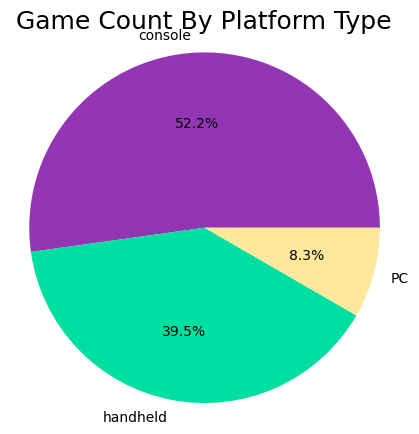

In [7]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

#directory to map consoles to console type
platform_type = {'2600': 'console', '3DO': 'console', '3DS': 'handheld', 'DC': 'console', 'DS': 'handheld',
                 'GB': 'handheld', 'GBA': 'handheld', 'GBC': 'handheld', 'GC': 'console', 'GEN': 'console',
                 'GG': 'console', 'Mob': 'handheld', 'N64': 'console', 'NES': 'console', 'NG': 'console',
                 'NS': 'handheld', 'OSX': 'PC', 'PC': 'PC', 'PCE': 'console', 'PCFX': 'console', 'PS': 'handheld',
                 'PS2': 'console', 'PS3': 'console', 'PS4': 'console', 'PSN': 'PC', 'PSP': 'handheld',
                 'PSV': 'handheld', 'SAT': 'console', 'SCD': 'handheld', 'SNES': 'console', 'VC': 'console',
                 'Wii': 'console', 'WiiU': 'handheld', 'WS': 'handheld', 'WW': 'console', 'X360': 'console',
                 'XB': 'console', 'XBL': 'console', 'XOne': 'console'}

df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

platform_counts = df['platform_type'].value_counts() #Counts total number of platforms of each platform type.
colors = ['#9336B4', '#00dfa2', '#FFE79B']  # Custom colors for the pie chart

plt.figure(figsize=(5, 5))
plt.pie(platform_counts, labels=platform_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Game Count By Platform Type', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

Percentage of games of a certian platform type (PC, Handheld and Console) from the df.

More than half of the games sold are console games.
The next pie chart will show the correlating sales.

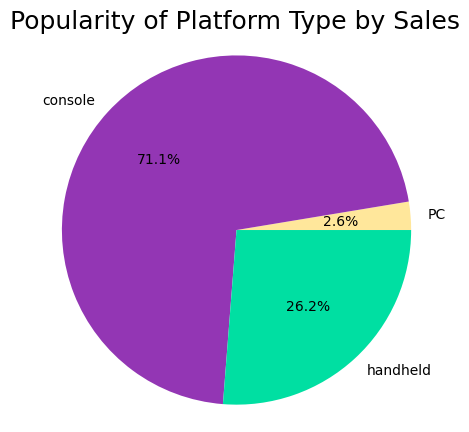

In [8]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

platform_type = {'2600': 'console', '3DO': 'console', '3DS': 'handheld', 'DC': 'console', 'DS': 'handheld',
                 'GB': 'handheld', 'GBA': 'handheld', 'GBC': 'handheld', 'GC': 'console', 'GEN': 'console',
                 'GG': 'console', 'Mob': 'handheld', 'N64': 'console', 'NES': 'console', 'NG': 'console',
                 'NS': 'handheld', 'OSX': 'PC', 'PC': 'PC', 'PCE': 'console', 'PCFX': 'console', 'PS': 'handheld',
                 'PS2': 'console', 'PS3': 'console', 'PS4': 'console', 'PSN': 'PC', 'PSP': 'handheld',
                 'PSV': 'handheld', 'SAT': 'console', 'SCD': 'handheld', 'SNES': 'console', 'VC': 'console',
                 'Wii': 'console', 'WiiU': 'handheld', 'WS': 'handheld', 'WW': 'console', 'X360': 'console',
                 'XB': 'console', 'XBL': 'console', 'XOne': 'console'}

df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

platform_sales = df.groupby("platform_type").sum()["total_sales"]
colors = ['#FFE79B', '#9336B4', '#00dfa2']  # Custom colors for the pie chart
plt.figure(figsize=(5, 5))

plt.pie(platform_sales, labels=platform_sales.index,colors=colors, autopct='%1.1f%%')
plt.title('Popularity of Platform Type by Sales', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

Percentage of game sales for each platform type. PC games are easily pirated, this explains its low platform sales.

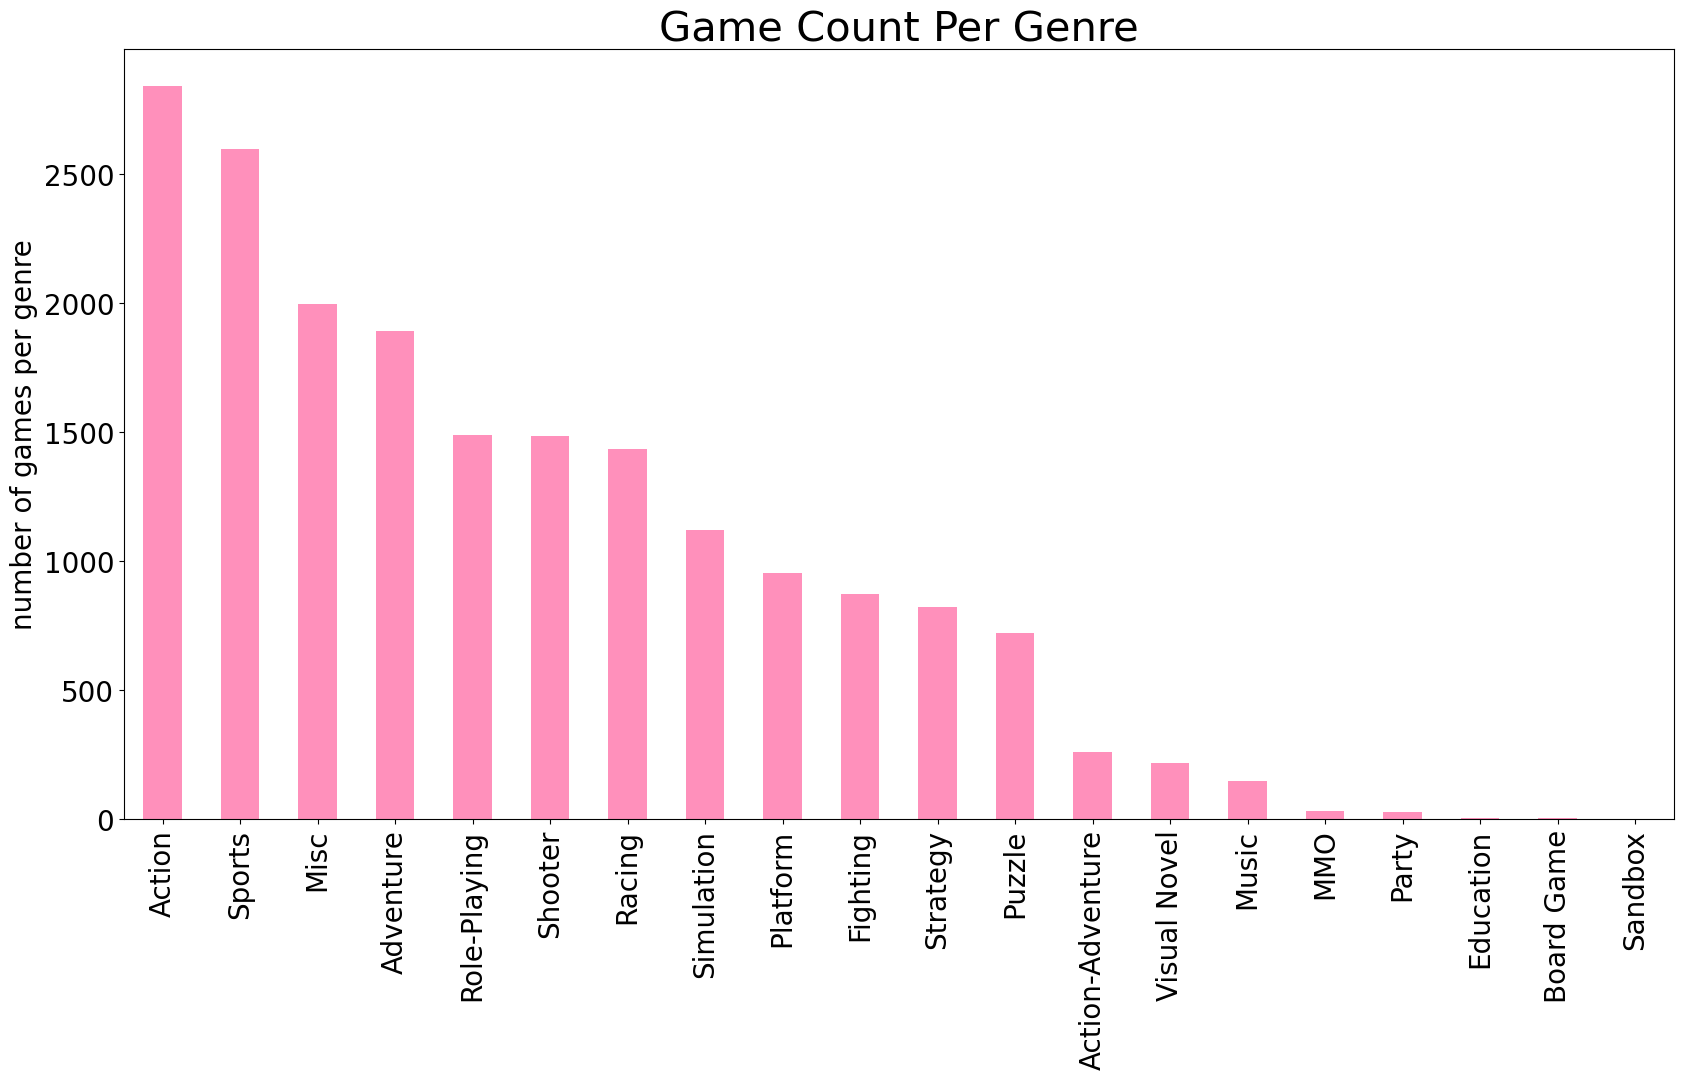

In [9]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

ax = df['genre'].value_counts().plot.bar(color='#FF90BB', fontsize=20, title='Game Count Per Genre', figsize=(20, 10))
ax.set_ylabel("number of games per genre",fontsize=20)
ax.title.set_size(30)

The action and sports games are developed considerably more than the others.

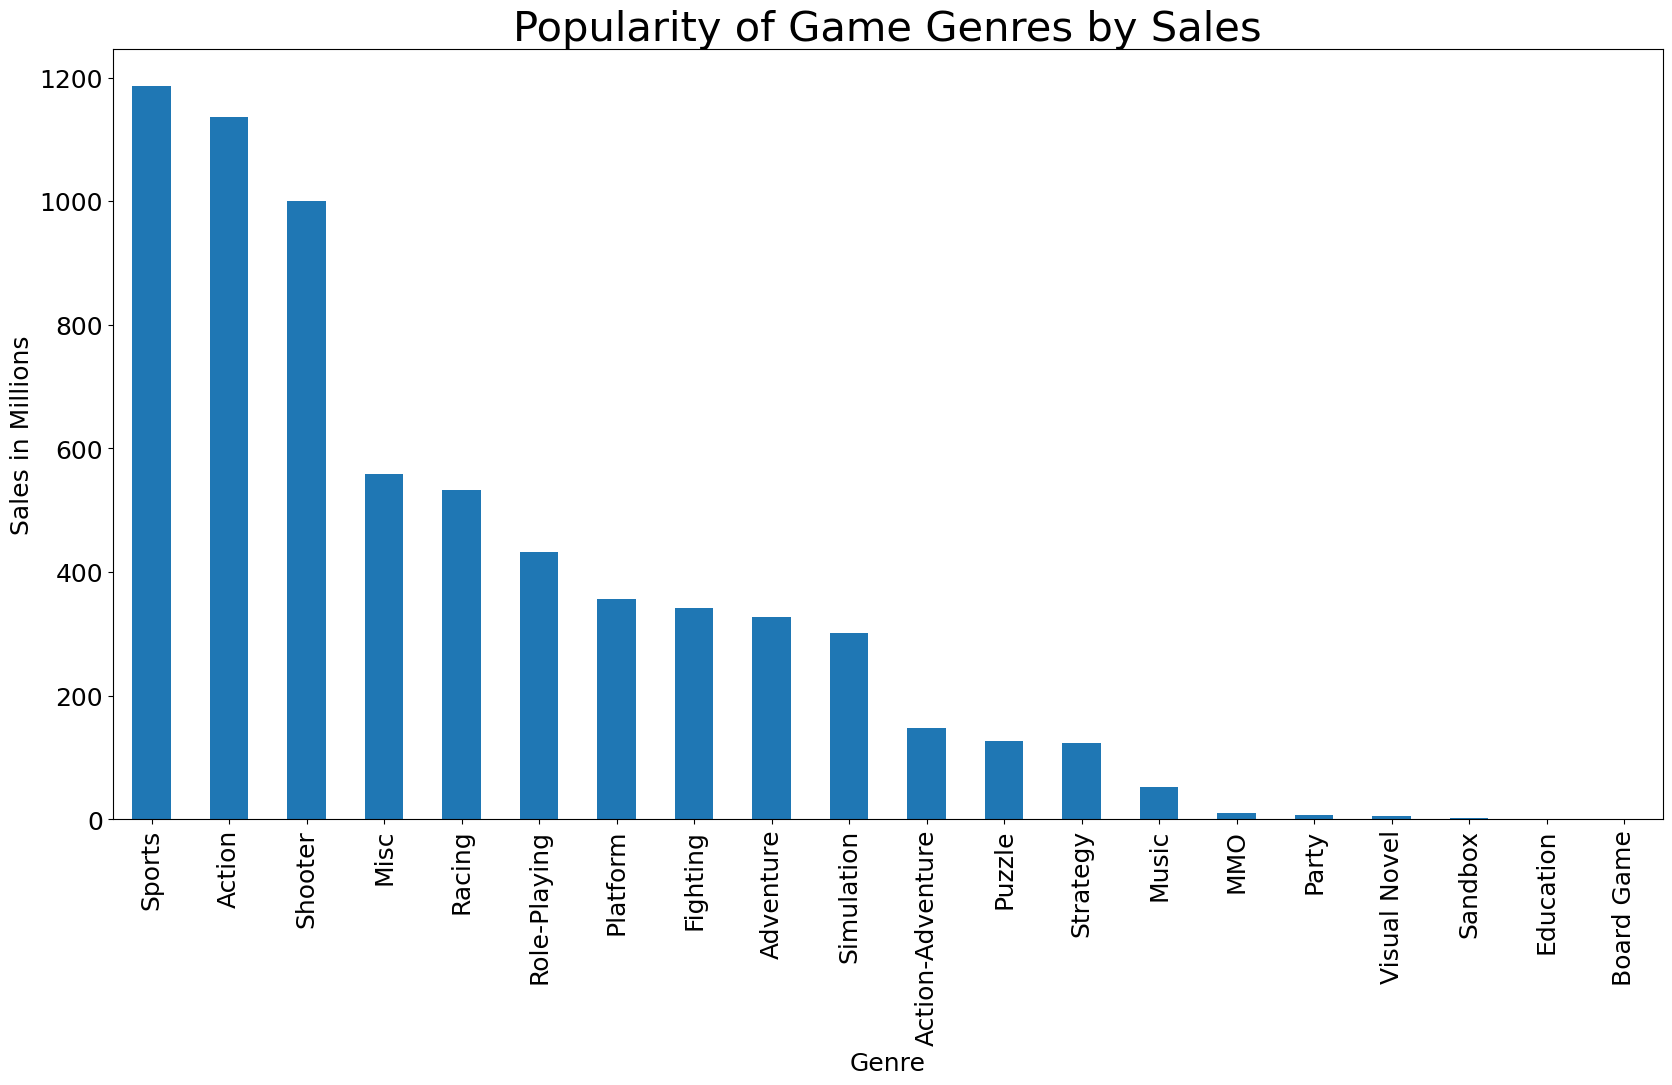

In [10]:
df = pd.read_csv("games_df.csv")

title = "Popularity of Game Genres by Sales"
ax1 = df.groupby("genre").sum()["total_sales"].sort_values(ascending=False).plot.bar(title=title, figsize=(20, 10), fontsize=18)

ax1.set_ylabel("Sales in Millions", fontsize=18)
ax1.set_xlabel("Genre", fontsize=18)
ax1.title.set_size(30)

plt.show()


Sports games sell the best even though action games are developed more.

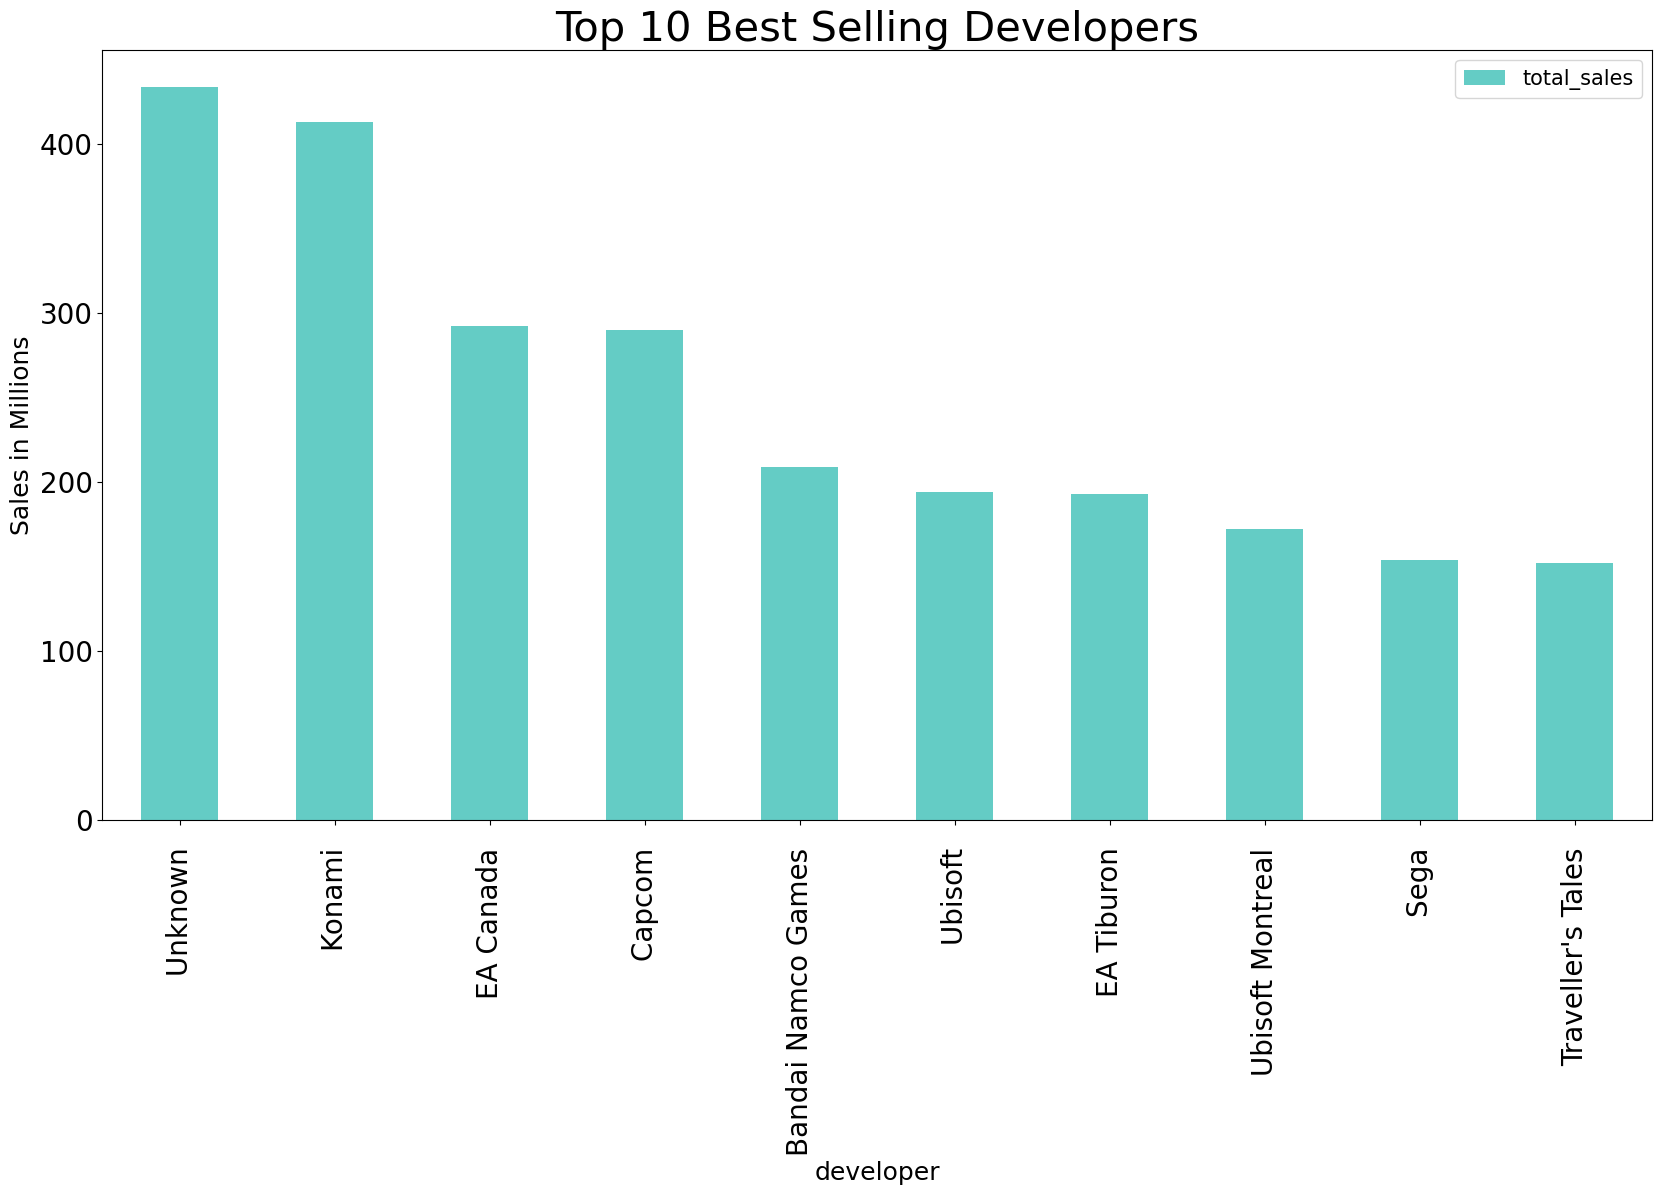

In [11]:
top_publishers = df[["developer", "total_sales"]].groupby("developer").count().sort_values("total_sales", ascending=False).head(10)
top_publishers.plot.bar(title="Top 10 Best Selling Developers",figsize=(20,10),fontsize=20, color ='#64CCC5'
).title.set_size(30)
plt.ylabel("Sales in Millions",fontsize=18)
plt.xlabel("developer",fontsize=18) 
plt.legend(fontsize=15)
plt.show()

Although a substantial number of games are developed by "unknown" developers, the sales ratio between all developers is still noticed.
We will now break down the genres of Konami, the next best selling developer.

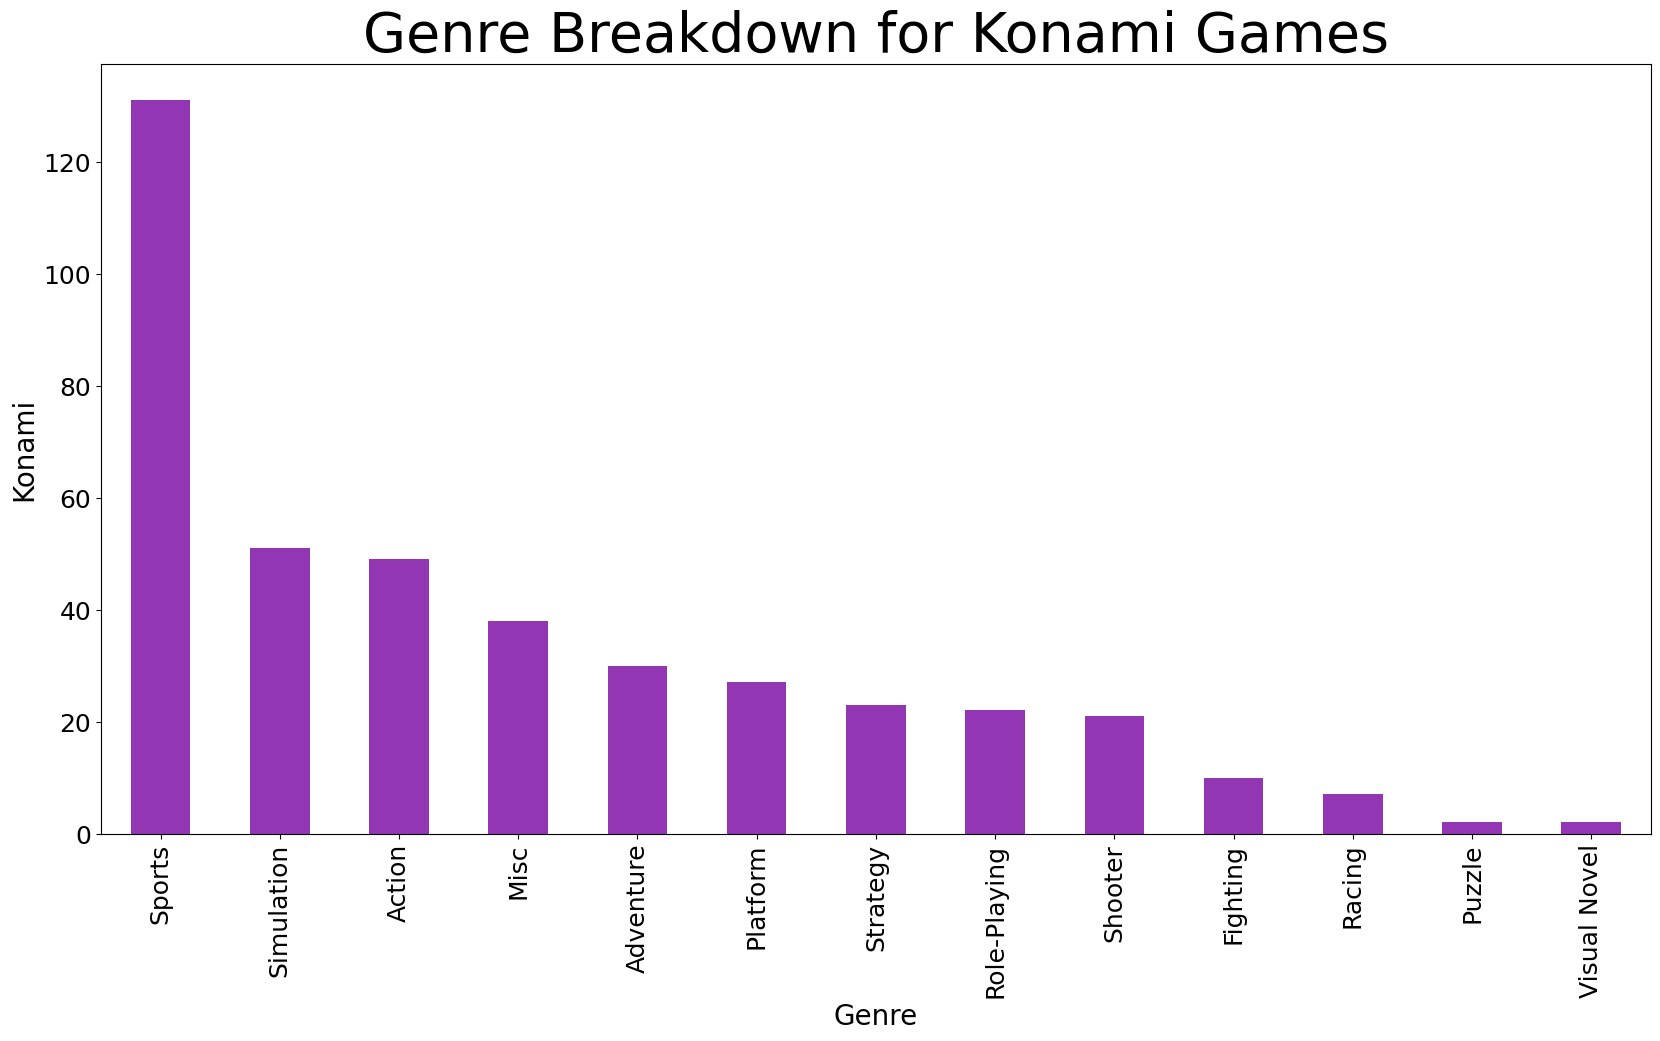

In [12]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Konami_Games = df.loc[df["developer"] == "Konami  "]
genre_counts = Konami_Games.groupby("genre").count()["total_sales"]
sorted_genre_counts = genre_counts.sort_values(ascending=False)  # Sort the genre counts in descending order

plt.figure(figsize=(20, 10))
ax = sorted_genre_counts.plot.bar(fontsize=18, title="Genre Breakdown for Konami Games", color='#9336B4')
ax.title.set_size(40)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Konami', fontsize=20)

plt.show()

Most of Konami's games fall under the sports genre. We will later see how crucial is "Sports" to other markets.

## Multivariate Analysis

Ideas:

* Stacked bar charts from examples above
* What are the publisher's best selling games?
* What are the best selling consoles?


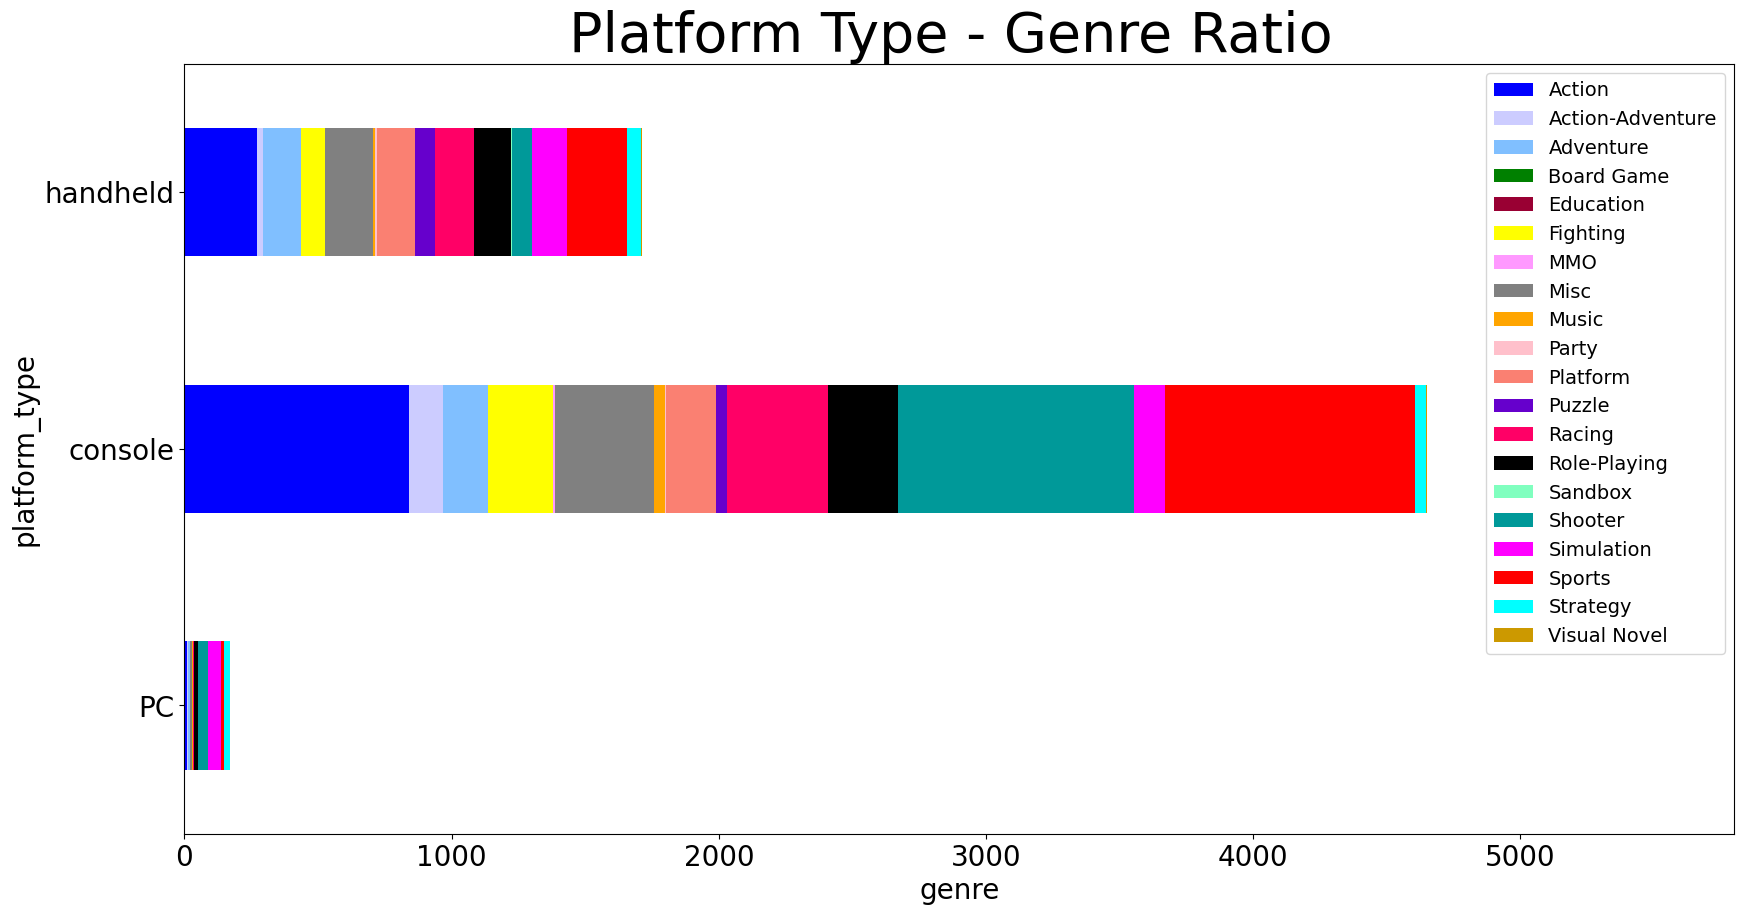

In [19]:
#קשר בין סוג פלטפורמה לזאנר
# creating a dictionary to map console to console type
platform_type = {'2600':"console",'3DO':"console",'3DS':"handheld",'DC':"console",'DS':"handheld",
                 'GB':"handheld",'GBA':"handheld",'GBC':"handheld",'GC':"console",'GEN':"console",
                 'GG':"console",'Mob':"handheld",'N64':"console",'NES':"console",'NG':"console",
                 'NS':"handheld",'OSX':"PC",'PC':"PC",'PCE':"console",'PCFX':"console",'PS':"handheld",
                 'PS2':"console",'PS3':"console",'PS4':"console",'PSN':"PC",'PSP':"handheld",'PSV':"handheld",
                 'SAT':"console",'SCD':"handheld",'SNES':"console",'VC':"console",'Wii':"console",
                 'WiiU':"handheld",'WS':"handheld",'WW':"console",'X360':"console",'XB':"console",
                 'XBL':"console",'XOne':"console"}
                


df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

console_count=df.groupby("platform").count()["total_sales"]
console_count = console_count[console_count > 55]
top_consoles = df[df.platform.isin(list(console_count.keys()))]

top_consoles\
    .groupby(["platform_type", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = 'Platform Type - Genre Ratio ',color = ['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','black','#80ffbf',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('platform_type',fontsize=20)
plt.legend(fontsize=14)
plt.xlim(0,5800)
plt.show()

פילוח של כמות ייצור משחקים בכל הזאנרים   בכל 3 סוגי הפלטפורמות

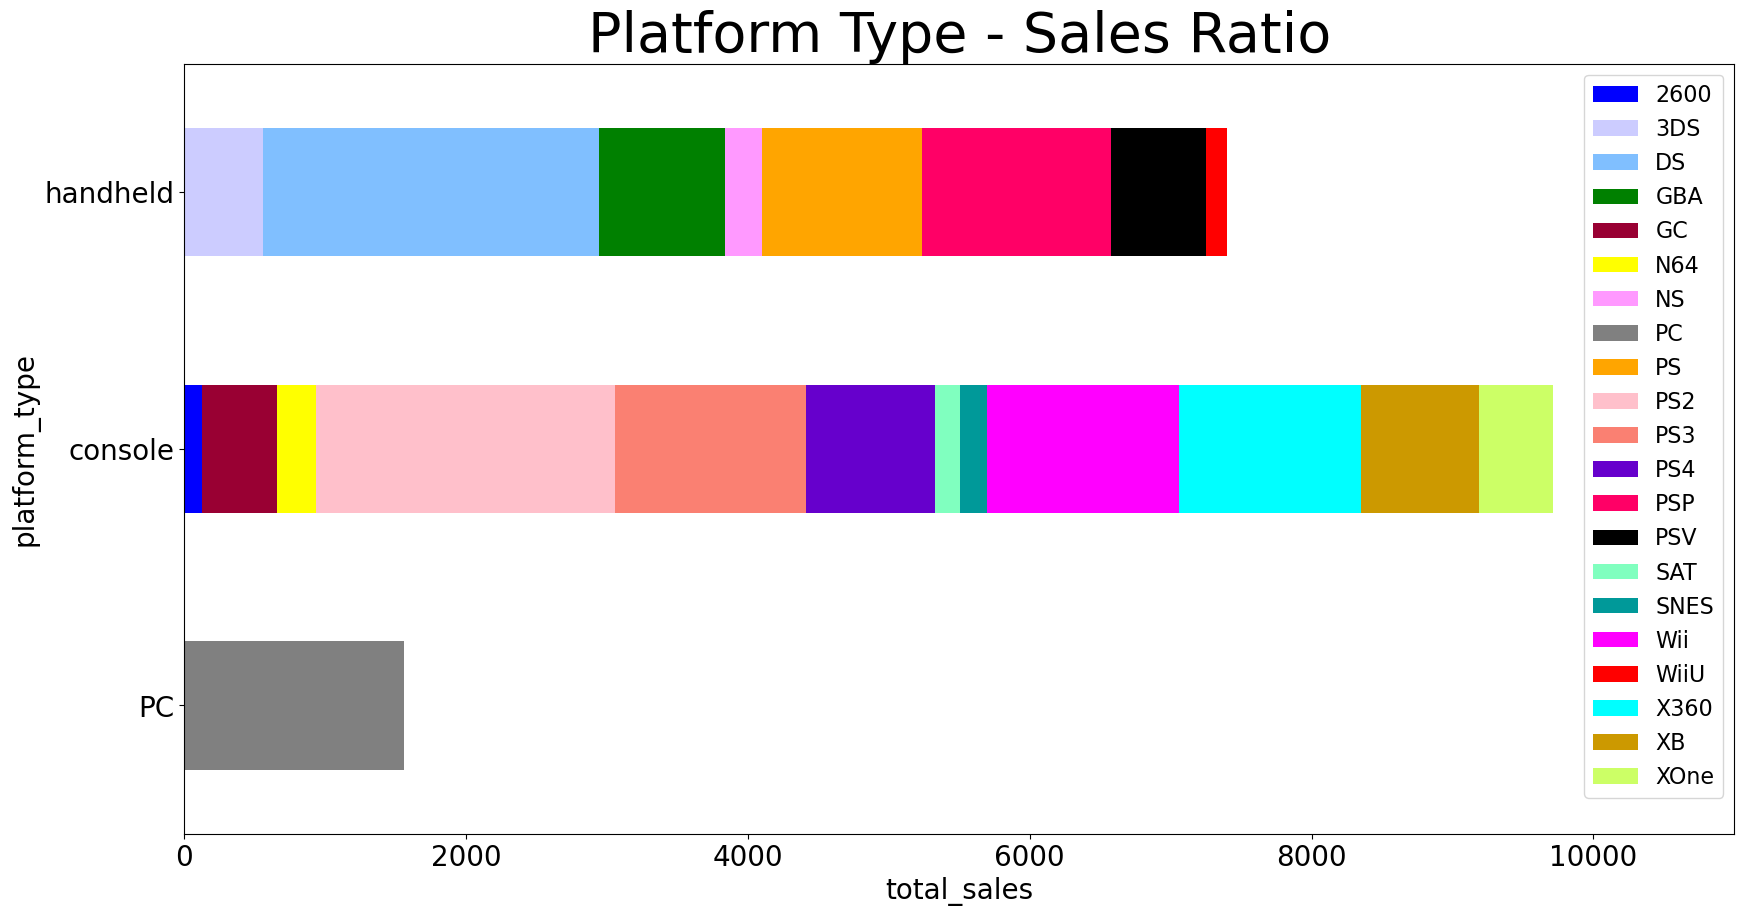

In [169]:
df = pd.read_csv("games_df.csv")
platform_type = {'2600': 'console', '3DO': 'console', '3DS': 'handheld', 'DC': 'console', 'DS': 'handheld',
                 'GB': 'handheld', 'GBA': 'handheld', 'GBC': 'handheld', 'GC': 'console', 'GEN': 'console',
                 'GG': 'console', 'Mob': 'handheld', 'N64': 'console', 'NES': 'console', 'NG': 'console',
                 'NS': 'handheld', 'OSX': 'PC', 'PC': 'PC', 'PCE': 'console', 'PCFX': 'console', 'PS': 'handheld',
                 'PS2': 'console', 'PS3': 'console', 'PS4': 'console', 'PSN': 'PC', 'PSP': 'handheld',
                 'PSV': 'handheld', 'SAT': 'console', 'SCD': 'handheld', 'SNES': 'console', 'VC': 'console',
                 'Wii': 'console', 'WiiU': 'handheld', 'WS': 'handheld', 'WW': 'console', 'X360': 'console',
                 'XB': 'console', 'XBL': 'console', 'XOne': 'console'}

df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

console_count=df.groupby("platform").count()["total_sales"]
console_count = console_count[console_count > 55]
top_consoles = df[df.platform.isin(list(console_count.keys()))]

top_consoles.groupby(["platform_type", "platform"]).count()["total_sales"]\
    .unstack("platform").fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = "Platform Type - Sales Ratio",color=['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','black','#80ffbf',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('total_sales',fontsize=20)
plt.ylabel('platform_type',fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0,11000)
plt.show()

Above is the visualization of the best selling consoles by platform type (which console has sold the most games, by platform type)
פילוח של מכירות משחקים לפי פלטפורמה   בכל 3 סוגי הפלטפורמות

In [170]:
df_n = df.copy()
df_n.drop(['name', 'developer','genre','total_sales','platform','other_sales','release_year'], axis='columns', inplace=True)


df_n = df_n.sort_values('japan_sales',ascending = True).groupby('platform_type').tail(100)


df_n = df_n.groupby('platform_type').agg({'na_sales':'sum',
                                           'eu_sales':'sum','japan_sales':'sum'})

df_n['max_sales'] = df_n.max(axis=1)
df_n['max_region'] = df_n.idxmax(axis=1)


df_n

#נעשה גרופביי סוג פלטפורמה ונחבר את המכירות
#קשר בין איזור לסוג פלטפורמה שזה בעצם איפה הפלטפורמה הכי הצליחה שזה איפה היא הכי נמכרה


#איפה נמכרו הכי הרבה מקונסולה מסויימת

,na_sales,eu_sales,japan_sales,max_sales,max_region
platform_type,,,,,
PC,7.41,7.47,1.57,7.47,eu_sales
console,34.99,45.09,87.11,87.11,japan_sales
handheld,10.46,7.84,78.21,78.21,japan_sales


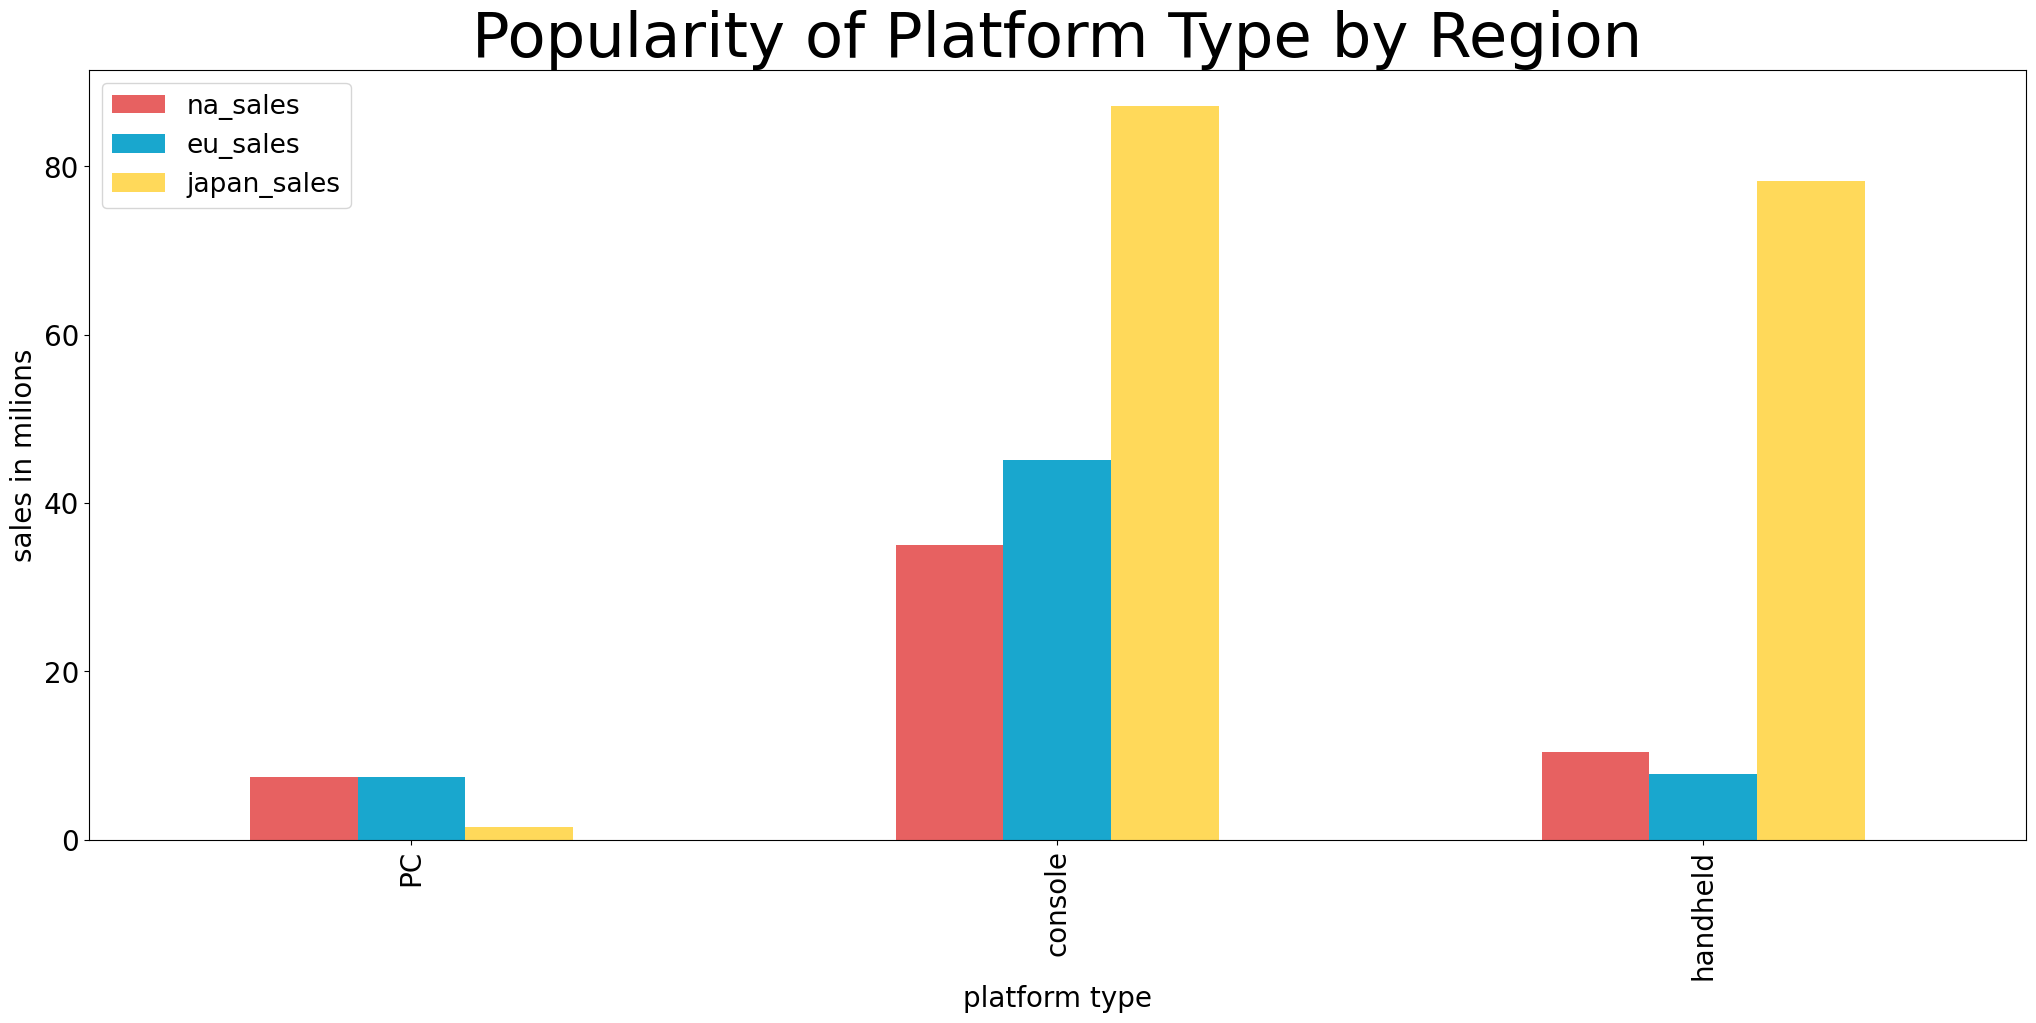

In [182]:
col_na_sales_list = df_n['na_sales'].tolist()
col_eu_sales_list = df_n['eu_sales'].tolist()
col_japan_sales_list = df_n['japan_sales'].tolist()
platform_type_to_list = df_n.index.values.tolist()

dff = pd.DataFrame({'na_sales': col_na_sales_list,
                   'eu_sales': col_eu_sales_list,
                  'japan_sales':col_japan_sales_list }, index = platform_type_to_list)
ax = dff.plot.bar(title = 'Popularity of Platform Type by Region',figsize=(25,10),fontsize=20, color = {'na_sales':'#E76161','eu_sales':'#19A7CE','japan_sales':'#FFD95A'})
ax.title.set_size(45)
plt.xlabel('platform type',fontsize=20)
plt.ylabel('sales in milions',fontsize=20)
plt.legend(fontsize=19)
plt.show()

The vast majority of handheld games are sold in Japan.

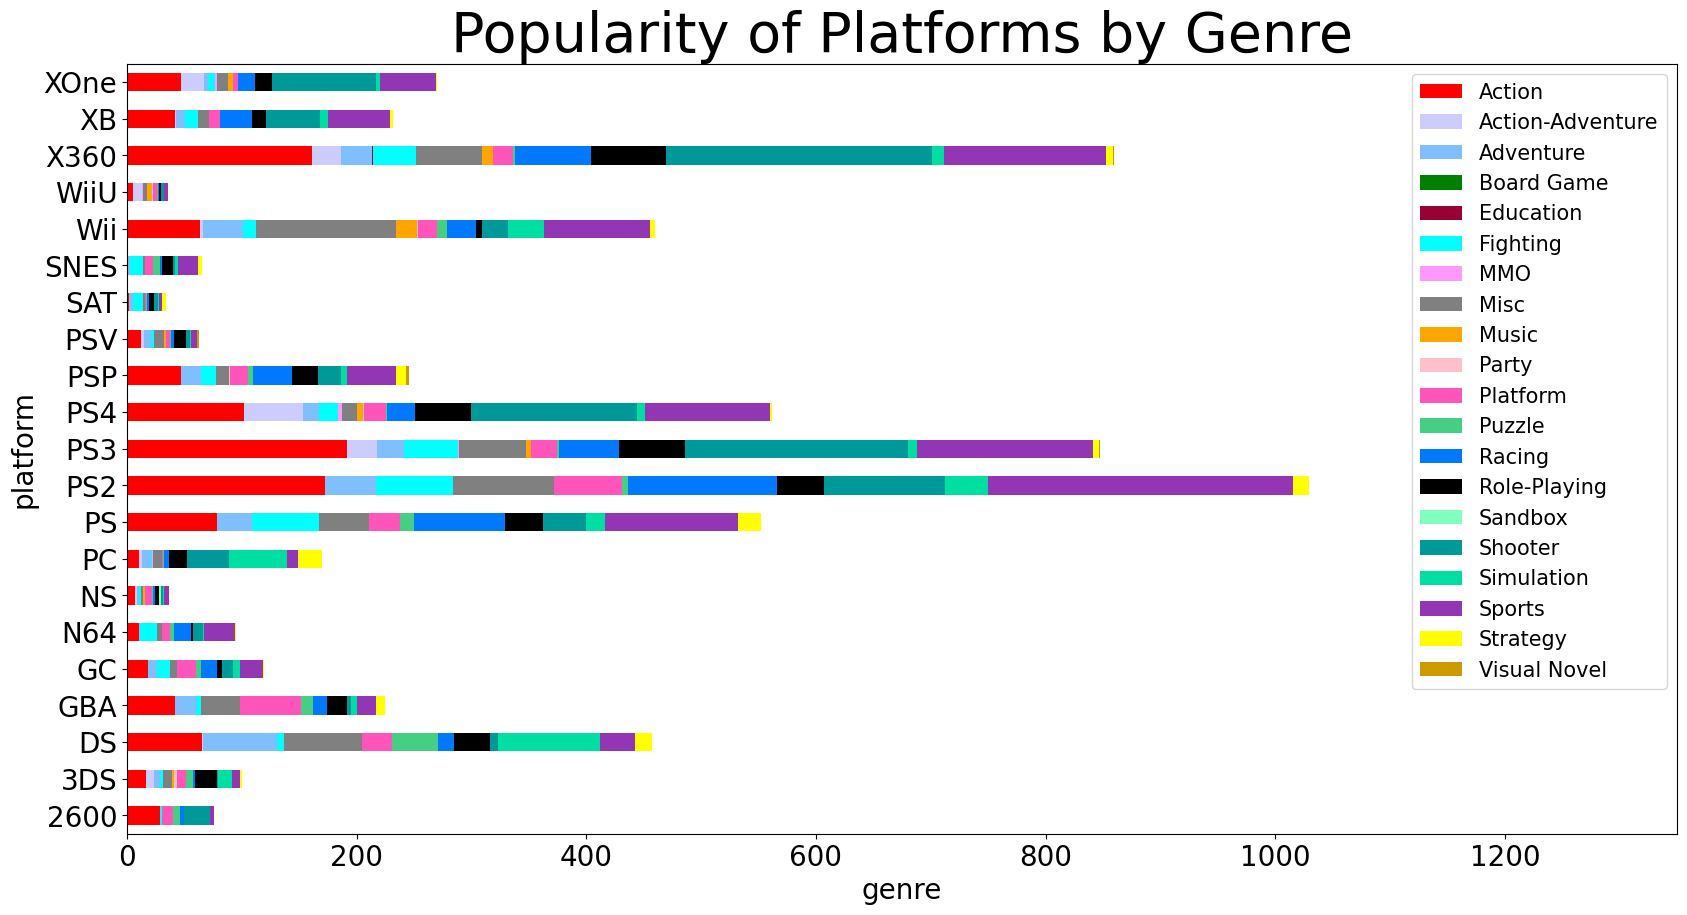

In [172]:
top_consoles\
    .groupby(["platform", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = 'Popularity of Platforms by Genre',color = ['red','#ccccff','#80bfff',
                                                                                            'green','#990033', 'Aqua','#ff99ff','grey','orange',
                                                                                            'pink','#FF55BB','#44cf82','#0079FF','black','#80ffbf',
                                                                                            '#009999','#00DFA2','#9336B4','yellow','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('platform',fontsize=20)
plt.legend(fontsize=15)
plt.xlim(0,1350)
plt.show()

Action and Sports games constitute a significant portion of PS2 games.

In [173]:
top_publishers = df.groupby("developer").count()["total_sales"].sort_values(ascending=False).head(10)
top_publishers = df[df["developer"].isin(top_publishers.keys())]

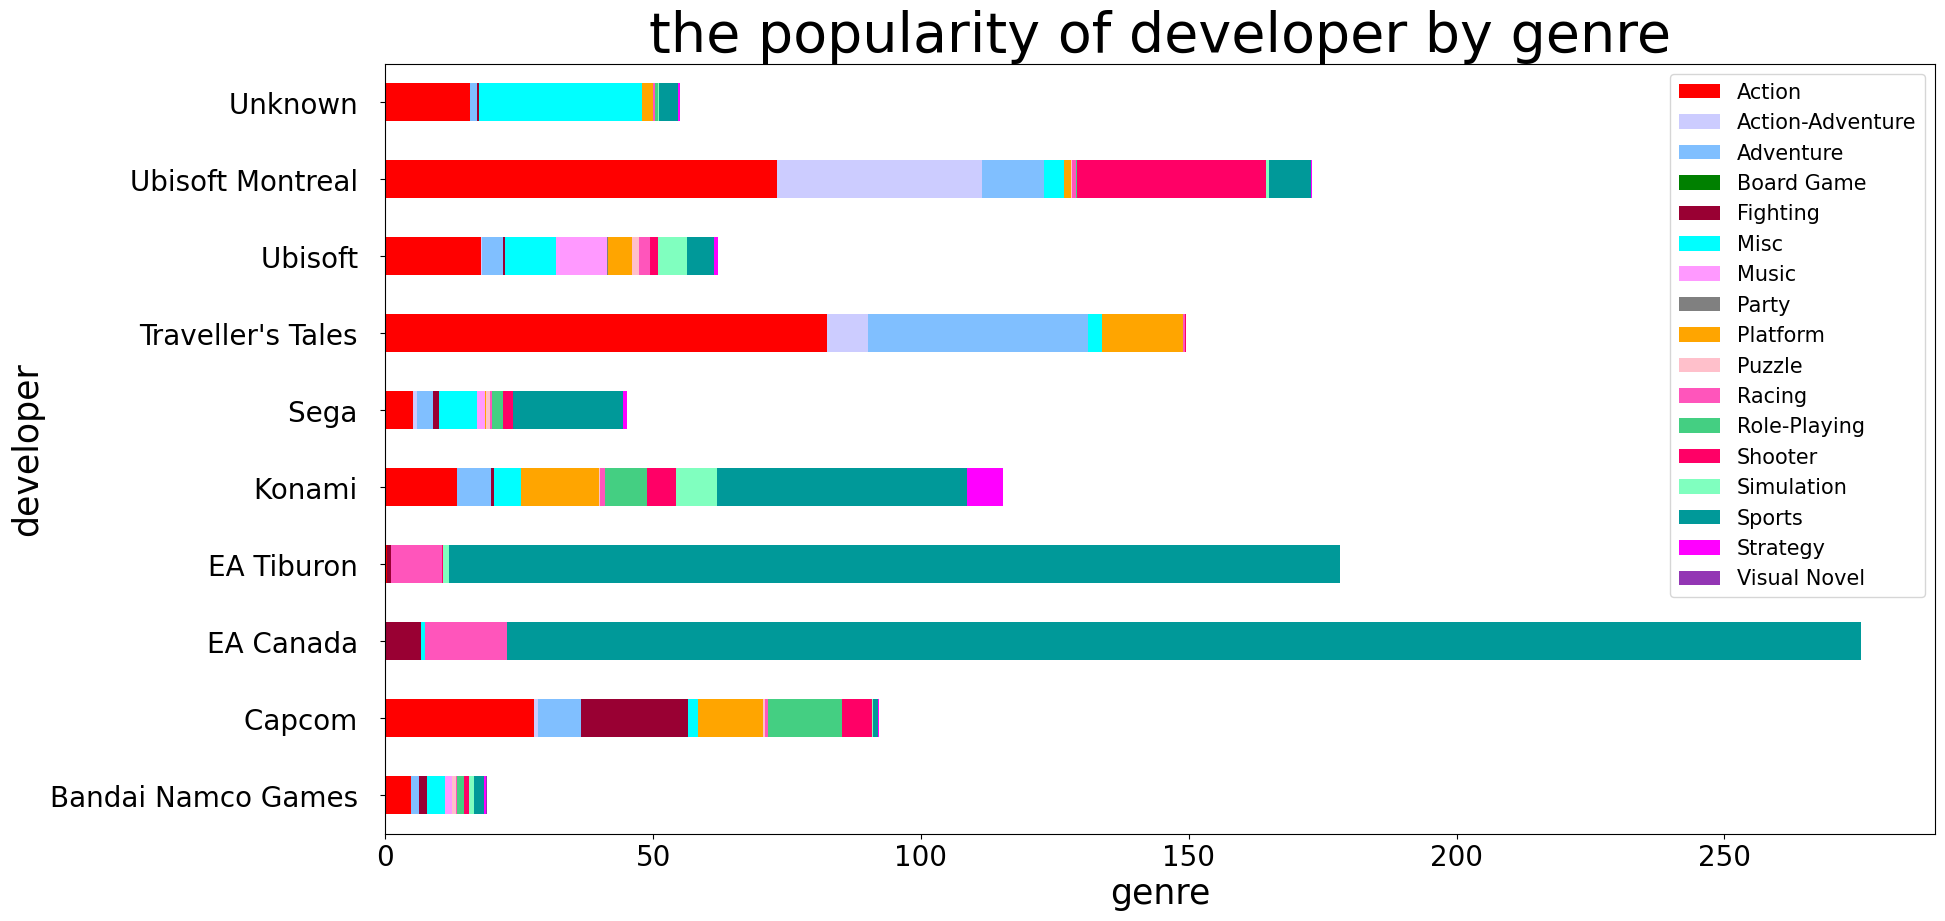

In [174]:
top_publishers.groupby(["developer", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True, figsize=(20,10),fontsize=20, title = 'the popularity of developer by genre',color = ['red','#ccccff','#80bfff',
                                                                                            'green','#990033', 'Aqua','#ff99ff','grey','orange',
                                                                                            'pink','#FF55BB','#44cf82','#ff0066','#80ffbf',
                                                                                            '#009999','Fuchsia','#9336B4','#9336B4','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=25)
plt.ylabel('developer',fontsize=25)
plt.legend(fontsize=15)
plt.show()

This graph depicts the distribution of genres of given developers. We can notice a dominant genre in most development companies, for example: EA specializes in the sports genre and sticks to it.

In [175]:
# יוצרים טבלה רק זאנר ומכירות
copy_of_data = df.copy()
data_by_genre = [copy_of_data['genre'],copy_of_data['total_sales'].astype(float)
                 ,copy_of_data['na_sales'].astype(float)
                 ,copy_of_data['eu_sales'].astype(float)
                 ,copy_of_data['japan_sales'].astype(float)
                 ,copy_of_data['other_sales'].astype(float)
                ]
headers = ["genre", "total_sales","na_sales","eu_sales","japan_sales","other_sales"]
sales_and_genres = pd.concat(data_by_genre, axis=1, keys=headers)
# choosing top 100 sales for each genre

df1 = sales_and_genres.sort_values('japan_sales',ascending = True).groupby('genre').tail(100)
df1

,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales
2992,Action-Adventure,0.16,0.07,0.07,0.01,0.01
2994,Action-Adventure,0.16,0.02,0.10,0.01,0.03
2996,Action-Adventure,0.16,0.10,0.05,0.01,0.01
5000,Education,0.12,0.09,0.02,0.01,0.00
5001,Education,0.09,0.08,0.01,0.01,0.01
...,...,...,...,...,...,...
11190,Role-Playing,5.35,1.75,1.23,1.87,0.51
15390,Sports,2.05,0.01,0.01,2.05,0.01
15380,Sports,2.20,0.15,0.01,2.05,0.01
15339,Sports,2.79,0.29,0.20,2.13,0.18


In [176]:
# מחברים שורות שיש בהן את אותו הזאנר ומחברים את המכירות
df = df1.groupby('genre').agg({'na_sales':'sum',
                                           'eu_sales':'sum','japan_sales':'sum'})
df

,na_sales,eu_sales,japan_sales
genre,,,
Action,56.31,51.30,36.49
Action-Adventure,47.76,46.56,5.47
Adventure,14.37,10.60,22.58
Board Game,0.08,0.24,0.04
Education,0.68,0.21,0.04
Fighting,14.58,10.70,38.02
MMO,4.06,3.05,1.54
Misc,10.32,10.42,33.93
Music,20.19,11.86,6.35


In [177]:
# נוסיף עמודה עם הערך הגבוה בכל שורה
df_max_sales = df.copy()
df_max_sales['max_sales'] = df_max_sales.max(axis=1)

df_max_sales

,na_sales,eu_sales,japan_sales,max_sales
genre,,,,
Action,56.31,51.30,36.49,56.31
Action-Adventure,47.76,46.56,5.47,47.76
Adventure,14.37,10.60,22.58,22.58
Board Game,0.08,0.24,0.04,0.24
Education,0.68,0.21,0.04,0.68
Fighting,14.58,10.70,38.02,38.02
MMO,4.06,3.05,1.54,4.06
Misc,10.32,10.42,33.93,33.93
Music,20.19,11.86,6.35,20.19


In [178]:
# נוסיף עמודה עם השם של העמודה של האזור ששיך אליו הערך המקסימלי
df_max_sales_region = df_max_sales.copy()
df_max_sales_region['max_region'] = df_max_sales_region.idxmax(axis=1)
df_max_sales_region

,na_sales,eu_sales,japan_sales,max_sales,max_region
genre,,,,,
Action,56.31,51.30,36.49,56.31,na_sales
Action-Adventure,47.76,46.56,5.47,47.76,na_sales
Adventure,14.37,10.60,22.58,22.58,japan_sales
Board Game,0.08,0.24,0.04,0.24,eu_sales
Education,0.68,0.21,0.04,0.68,na_sales
Fighting,14.58,10.70,38.02,38.02,japan_sales
MMO,4.06,3.05,1.54,4.06,na_sales
Misc,10.32,10.42,33.93,33.93,japan_sales
Music,20.19,11.86,6.35,20.19,na_sales


In [179]:
col_na_sales = df_max_sales_region['na_sales'].tolist()
col_eu_sales = df_max_sales_region['eu_sales'].tolist()
col_japan_sales = df_max_sales_region['japan_sales'].tolist()
genre = df_max_sales_region.index.values.tolist()

genre

['Action',
 'Action-Adventure',
 'Adventure',
 'Board Game',
 'Education',
 'Fighting',
 'MMO',
 'Misc',
 'Music',
 'Party',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Sandbox',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Visual Novel']

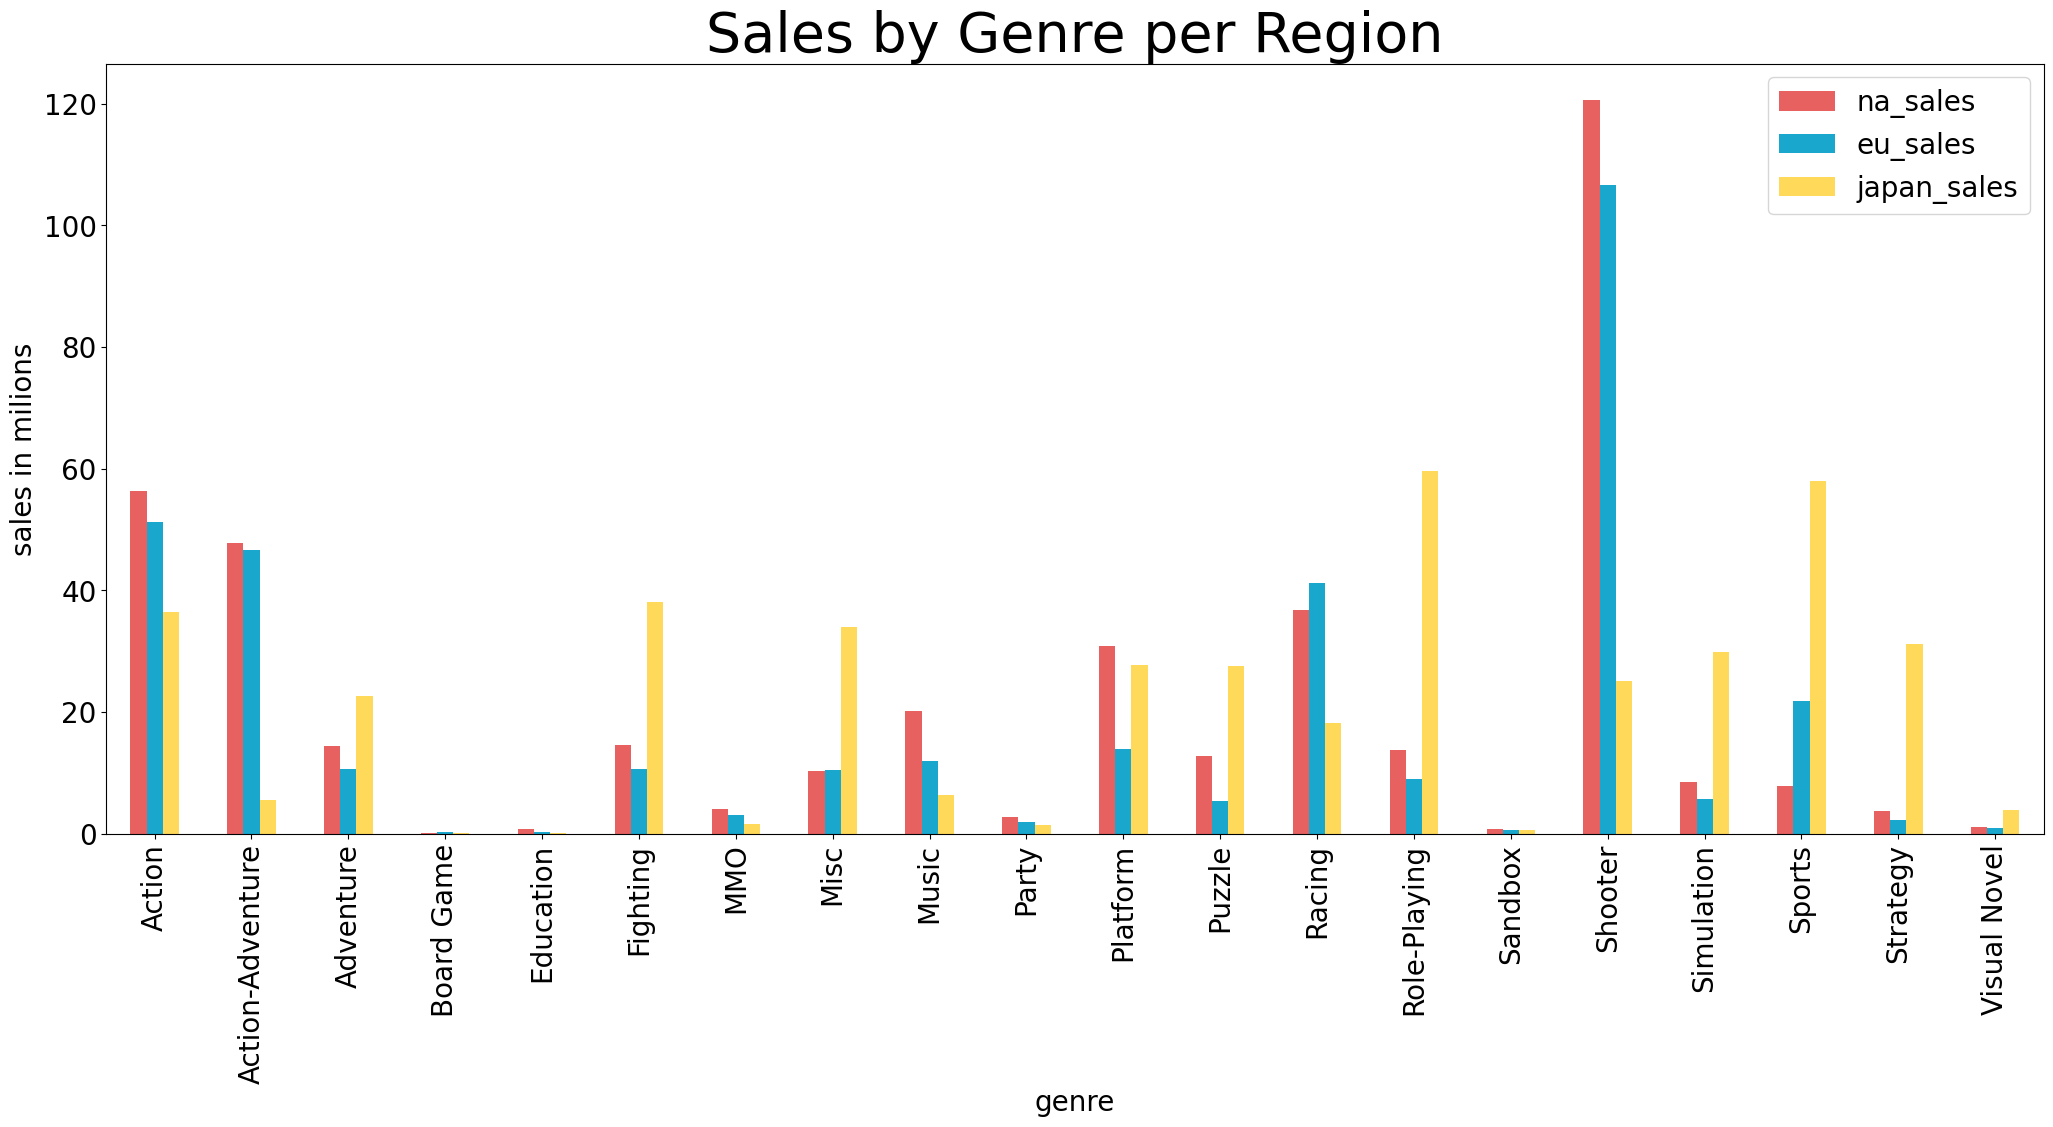

In [181]:
df = pd.DataFrame({'na_sales': col_na_sales,
                   'eu_sales': col_eu_sales,
                  'japan_sales':col_japan_sales }, index = genre)
ax = df.plot.bar(title = 'Sales by Region per Genre',figsize=(25,10),fontsize=20, color = {'na_sales':'#E76161','eu_sales':'#19A7CE','japan_sales':'#FFD95A'})
ax.title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('sales in milions',fontsize=20)
plt.legend(fontsize=20)
plt.show()

רואים את הצלחת הזאנרים בפילוח לפי אזור

While the Japanese market does not have a clear leading genre, the European and North American markets have a clear leading genre: Shooter.

# Machine Learning

In [70]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [21]:
pip install scikit-learn

In [71]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Machine learning
import sklearn
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

 # KNN
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# Supervised Learning
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# Naive
from sklearn.naive_bayes import GaussianNB

#decision_tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier




In [72]:
df = pd.read_csv(r"E:\שנה ב\סמסטר ב\מדעי הנתונים\פרויקט\Oz_Ido\games_df.csv")

df.drop(['Unnamed: 0','total_sales'],axis=1, inplace = True)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Rockstar North,PS4,Action,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Rockstar North,X360,Action,9.06,5.33,0.06,1.42,2013
4,Grand Theft Auto III,DMA Design,PS2,Action,6.99,4.51,0.30,1.30,2001
...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.01,0.01,0.00,0.01,2018
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.01,0.01,0.00,0.01,2018
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.01,0.01,0.00,0.01,2018
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.01,0.01,0.00,0.01,2013


In [73]:
column_names_to_normalize = ['other_sales','na_sales', 'eu_sales', 'japan_sales']
min_max_scaler = preprocessing.MinMaxScaler()
#Creates an instance of the MinMaxScaler class from the preprocessing module.
#This scaler is used to perform min-max normalization on the specified cols.


## נרמול ארבעת עמודות המכירה + הוספת עמודת סוג פלטפורמה (התאפשר בזכות מיפוי) ##


x = df[column_names_to_normalize].values
##Extracts values of the cols in "column_names_to_normalize" from the DataFrame "df" &
#assigns them to the variable x.
##The values attribute returns a NumPy array containing the selected column values.

x_scaled = min_max_scaler.fit_transform(x)
##Applies min-max scaling to the values in x using "fit_transform" method of the min_max_scaler object.

##"fit_transform" method calculates the minimum and maximum values of the data   &   performs scaling accordingly.

df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
#Creates a  NEW   DataFrame called "df_temp" using the SCALED values "x_scaled".
#The cols' parameter = the column names.
#The index parameter sets the index of "df_temp" to match the index of the original DataFrame "df".

df[column_names_to_normalize] = df_temp





## מיפוי סוגי הפלטפורמות ##
platform_type = {'2600':"console",'3DO':"console",'3DS':"handheld",'DC':"console",'DS':"handheld",
                 'GB':"handheld",'GBA':"handheld",'GBC':"handheld",'GC':"console",'GEN':"console",
                 'GG':"console",'Mob':"handheld",'N64':"console",'NES':"console",'NG':"console",
                 'NS':"handheld",'OSX':"PC",'PC':"PC",'PCE':"console",'PCFX':"console",'PS':"handheld",
                 'PS2':"console",'PS3':"console",'PS4':"console",'PSN':"PC",'PSP':"handheld",'PSV':"handheld",
                 'SAT':"console",'SCD':"handheld",'SNES':"console",'VC':"console",'Wii':"console",
                 'WiiU':"handheld",'WS':"handheld",'WW':"console",'X360':"console",'XB':"console",
                 'XBL':"console",'XOne':"console"}
                

    
    
    

df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,0.652664,1.000000,0.456221,1.000000,2013,console
1,Grand Theft Auto V,Rockstar North,PS4,Action,0.620902,0.985787,0.276498,0.967949,2014,console
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,0.861680,0.557360,0.216590,0.570513,2002,console
3,Grand Theft Auto V,Rockstar North,X360,Action,0.928279,0.541117,0.027650,0.455128,2013,console
4,Grand Theft Auto III,DMA Design,PS2,Action,0.716189,0.457868,0.138249,0.416667,2001,console
...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.001025,0.001015,0.000000,0.003205,2013,console


In [74]:
df_sales = df.copy()
df_sales.drop(['name','developer','platform','genre','release_year','platform_type'],axis=1, inplace = True)


df['max_region'] = df_sales.idxmax(axis=1) #Creates max region, holds name of col that has max value.
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,max_region
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,0.652664,1.000000,0.456221,1.000000,2013,console,eu_sales
1,Grand Theft Auto V,Rockstar North,PS4,Action,0.620902,0.985787,0.276498,0.967949,2014,console,eu_sales
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,0.861680,0.557360,0.216590,0.570513,2002,console,na_sales
3,Grand Theft Auto V,Rockstar North,X360,Action,0.928279,0.541117,0.027650,0.455128,2013,console,na_sales
4,Grand Theft Auto III,DMA Design,PS2,Action,0.716189,0.457868,0.138249,0.416667,2001,console,na_sales
...,...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.001025,0.001015,0.000000,0.003205,2013,console,other_sales


## Classification of 0 and 1 predictions

In [40]:
#Works column-wise: finishes an entire col before continuing to the next.


df['na_sucsses']= (df['max_region'].str.lower() == 'na_sales').astype(int)
#Asks is "max region" string == "na_sales" string.   1 for true, 0 for false.

df['eu_sucsses']= (df['max_region'].str.lower() == 'eu_sales').astype(int)
df['japan_sucsses']= (df['max_region'].str.lower() == 'japan_sales').astype(int)
df['other_sucsses']= (df['max_region'].str.lower() == 'other_sales').astype(int)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,max_region,na_sucsses,eu_sucsses,japan_sucsses,other_sucsses
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,0.652664,1.000000,0.456221,1.000000,2013,console,eu_sales,0,1,0,0
1,Grand Theft Auto V,Rockstar North,PS4,Action,0.620902,0.985787,0.276498,0.967949,2014,console,eu_sales,0,1,0,0
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,0.861680,0.557360,0.216590,0.570513,2002,console,na_sales,1,0,0,0
3,Grand Theft Auto V,Rockstar North,X360,Action,0.928279,0.541117,0.027650,0.455128,2013,console,na_sales,1,0,0,0
4,Grand Theft Auto III,DMA Design,PS2,Action,0.716189,0.457868,0.138249,0.416667,2001,console,na_sales,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales,0,0,0,1
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales,0,0,0,1
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales,0,0,0,1
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.001025,0.001015,0.000000,0.003205,2013,console,other_sales,0,0,0,1


In [41]:
df.drop(['platform','name','max_region'],axis=1, inplace = True)

In [42]:
#### FUNCTION that changes String --> Numeric ####

def transfer_str_to_numeric_vals(dataset,str_cols):
    for col in str_cols:
        le = preprocessing.LabelEncoder()#Assign a label encoder to each col.
        dataset[col] = le.fit_transform(dataset[col]) #Works column-wise. Changes categorial to numeric. 
    return dataset  

In [43]:
#Let's call the function written above:

col_to_transferred = ['developer','genre','platform_type']
df = transfer_str_to_numeric_vals(df,col_to_transferred)

In [44]:
df

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,na_sucsses,eu_sucsses,japan_sucsses,other_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0,1,0,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0,1,0,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,1,0,0,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,1,0,0,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0,0,0,1
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0,0,0,1
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0,0,0,1
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0,0,0,1


## NA Model

In [45]:
df_ml_na = df.copy()
df_ml_na.drop(['eu_sucsses','japan_sucsses','other_sucsses'],axis=1, inplace = True) #Leave only "na"
df_ml_na

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,na_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,1
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,1
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,1
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0


#### split to train and test

In [46]:
##This FUNCTION "split_train_and_test" takes two arguments:
#1. a dataFrame called "ML"
#2. "target_col" (the target column name)

#Splits the dataset into TRAINING (80%) and TESTING sets (20%), &
#    returns the feature matrices מטריצת מאפיינים     and target vectors וקטור מטרה   for both sets.

#Feature matrix = 2D array that contains the input features of the dataset.
#Target Vectors = 1 dimensional array that contains the target variable of the dataset.

#"target variable" refers to the variable or attribute in a dataset that we
#  want to predict or classify based on the input features.


def split_train_and_test(ML,target_col):
    feature_vector = ML.columns[ML.columns != target_col] #Defines feature_vector as all the columns of ML except for the target_col.
    target_feature = target_col #Sets target_feature as the target_col.

    X = ML[feature_vector] #Creates the "feature matrix X" by selecting the columns specified in feature_vector.
    y = ML[target_feature] #Creates the "target vector Y" by selecting the column specified in target_feature.
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    #Uses the train_test_split function to split the data into training and testing sets,
    ##with a test size of 0.2 (20% of the data) and a random state of 55.
    #The random_state parameter is used to control the random shuffling of the data during the train-test split.
    
    return X_train, X_test, y_train, y_test
#Finally, returns the training and testing feature matrices (X_train and X_test) and the corresponding target vectors (y_train and y_test).

In [47]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_na,'na_sucsses')
#This line calls the split_train_and_test function, passing in the DataFrame df_ml_na
#and the target column name 'na_success'.

#It assigns the returned values (X_train, X_test, y_train, y_test) to the respective variables.

In [48]:
# Models

#Logistic regression is a statistical model used for binary classification tasks.
#Predicts the probability of an outcome using independent variables and a logistic function.
#The model estimates coefficients through maximum likelihood estimation and makes predictions
#based on a predefined threshold.


#Takes X_train and y_train as arguments.
#Creates a logistic regression classifier (LogisticRegression()).
#Fits the classifier to the training data (X_train and y_train).
#Finally, it returns the trained classifier (clf).



def logistic_regression(X_train, y_train):
    clf = LogisticRegression().fit(X_train, y_train)
    return clf





def KNN(X_train, y_train):
    best_k = find_best_K(X_train, y_train)
    params = {'n_neighbors':best_k}

    clf = KNeighborsClassifier(n_neighbors=params['n_neighbors']).fit(X_train, y_train)
    print("Best K is:",best_k,"\n")
    return clf






def find_best_K(X_train, y_train):
    parameters = {'n_neighbors':[x for x in range(3,20,2)]}
    #Defines parameters as a dictionary with a range of "n_neighbors" values to test.
    #Lower bound = 3, lower might result in underfitting.
    #Upper Bound = 20, higher might result in including too much noise from unrelated instances.
    #Step Size = 2, ensures no tie in the majority voting.
    
    knn = KNeighborsClassifier()
    #Creates a K-nearest neighbors classifier "KNeighborsClassifier()"

    clf = GridSearchCV(knn, parameters, scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    #Uses GridSearchCV to perform a grid search over the specified parameters.
    
    clf.fit(X_train, y_train)
    #Fits the grid search object to the training data (X_train and y_train).
    
    best_K = clf.best_params_['n_neighbors']
    #Retrieves the best value of "n_neighbors" from the grid search results.
    
    return best_K



#Like a flow chart.
#The decision_tree FUNCTION takes the scaled training data "X_train" & the
#corresponding labels "y_train", and finds the best parameters (max_depth and min_samples_split)
#for the decision tree  BY USING grid search.

def decision_tree(X_train, y_train):
    best_max_depth, best_min_samples_split = find_best_decision_tree_params(X_train, y_train)
    params = {'max_depth':best_max_depth, 'min_samples_split':best_min_samples_split}
    #It calls the find_best_decision_tree_params function to find the best values
    ##for max_depth and min_samples_split for the decision tree.
    
    clf = DecisionTreeClassifier(max_depth=params['max_depth'],
                                 min_samples_split=params['min_samples_split']).fit(X_train, y_train)
    #It creates a dictionary params with the best values of "max_depth" and "min_samples_split".
    
    print("Best max depth is:",best_max_depth,"\n")
    print("Best min samples split:",best_min_samples_split,"\n")
    return clf
    
    
    
    
    
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':[2,4,6,8,10], 'min_samples_split':[5,10,15,20]}
    #Defines parameters as a dictionary with the values to test for max_depth and min_samples_split.
    
    dt = tree.DecisionTreeClassifier()
    #Creates a decision tree classifier (DecisionTreeClassifier()).
    
    clf = GridSearchCV(dt,parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    #Uses GridSearchCV to perform a grid search over the specified parameters.
    
    clf.fit(X_train, y_train)
    #It fits the grid search object to the training data (X_train and y_train).
    
    best_max_depth = clf.best_params_['max_depth']
    #It retrieves the best values of max_depth and min_samples_split from the grid search results.
    
    best_min_samples_split = clf.best_params_['min_samples_split']
    #Finally, it returns the best values (best_max_depth and best_min_samples_split).
    
    return best_max_depth, best_min_samples_split

In [49]:
# Display & evaluate confusion matrix of each model

def evo_met(y_test , y_pred,name):   
    evo = metrics.confusion_matrix(y_test , y_pred)
    #The y_test parameter represents the true labels (actual values) of the test dataset,
    ##and y_pred represents the predicted labels obtained from the model.
    
    df_confusion = pd.DataFrame(evo , index=['Actual Negative','Actual Positive'],columns=['Predicted Negative','Predicted Positive'])
    #Creates a dataframe FROM the confusion matrix 
    #Index parameter = rows
    #Columns parameter = cols
    
    print("confusion matrix of",name,"is:\n")
    display(df_confusion)

In [50]:
# Scale the data
scaler = StandardScaler()
#Creates an instance of the StandardScaler class, which will be used to scale the data

X_scale_train = scaler.fit_transform(X_train) 

X_scale_test = scaler.transform(X_test)

In [51]:
# Lists
#The lines declare and initialize four lists: category, machine, train, and test.

category = ['accuracy','precision','recall','f1_score']


machine = ['logistic_regression','KNN','decision_tree']
#Represents the names of the machine learning models
##that will be used or evaluated in the following steps.

train = []
test = []


## logistic_regression

In [52]:
LR_clf = logistic_regression(X_scale_train, y_train)
#Variable LR_clf now holds the trained logistic regression classifier,
##which can be used for making predictions on new, unseen data or for further evaluation or analysis.

In [53]:
LR_y_pred_train = LR_clf.predict(X_scale_train)
#Predicts labels for scaled training data using logistic regression.

train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
#Calculates accuracy score of LR's predictions on training data    &    adds it to train list.

evo_met(y_train, LR_y_pred_train,'logistic regression train')
#Displays confusion matrix for LR's predictions on training data.


confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,8907,190
Actual Positive,675,5363


In [54]:
LR_y_pred_test = LR_clf.predict(X_scale_test)
#Predicts labels for the scaled test data using the logistic regression classifier.

test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
#Calculates accuracy score of LR's predictions on the test data and adds it to the test list.

evo_met(y_test, LR_y_pred_test,'logistic regression test')
#Displays the confusion matrix for the LR's predictions on the test data.


confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,2210,49
Actual Positive,169,1356


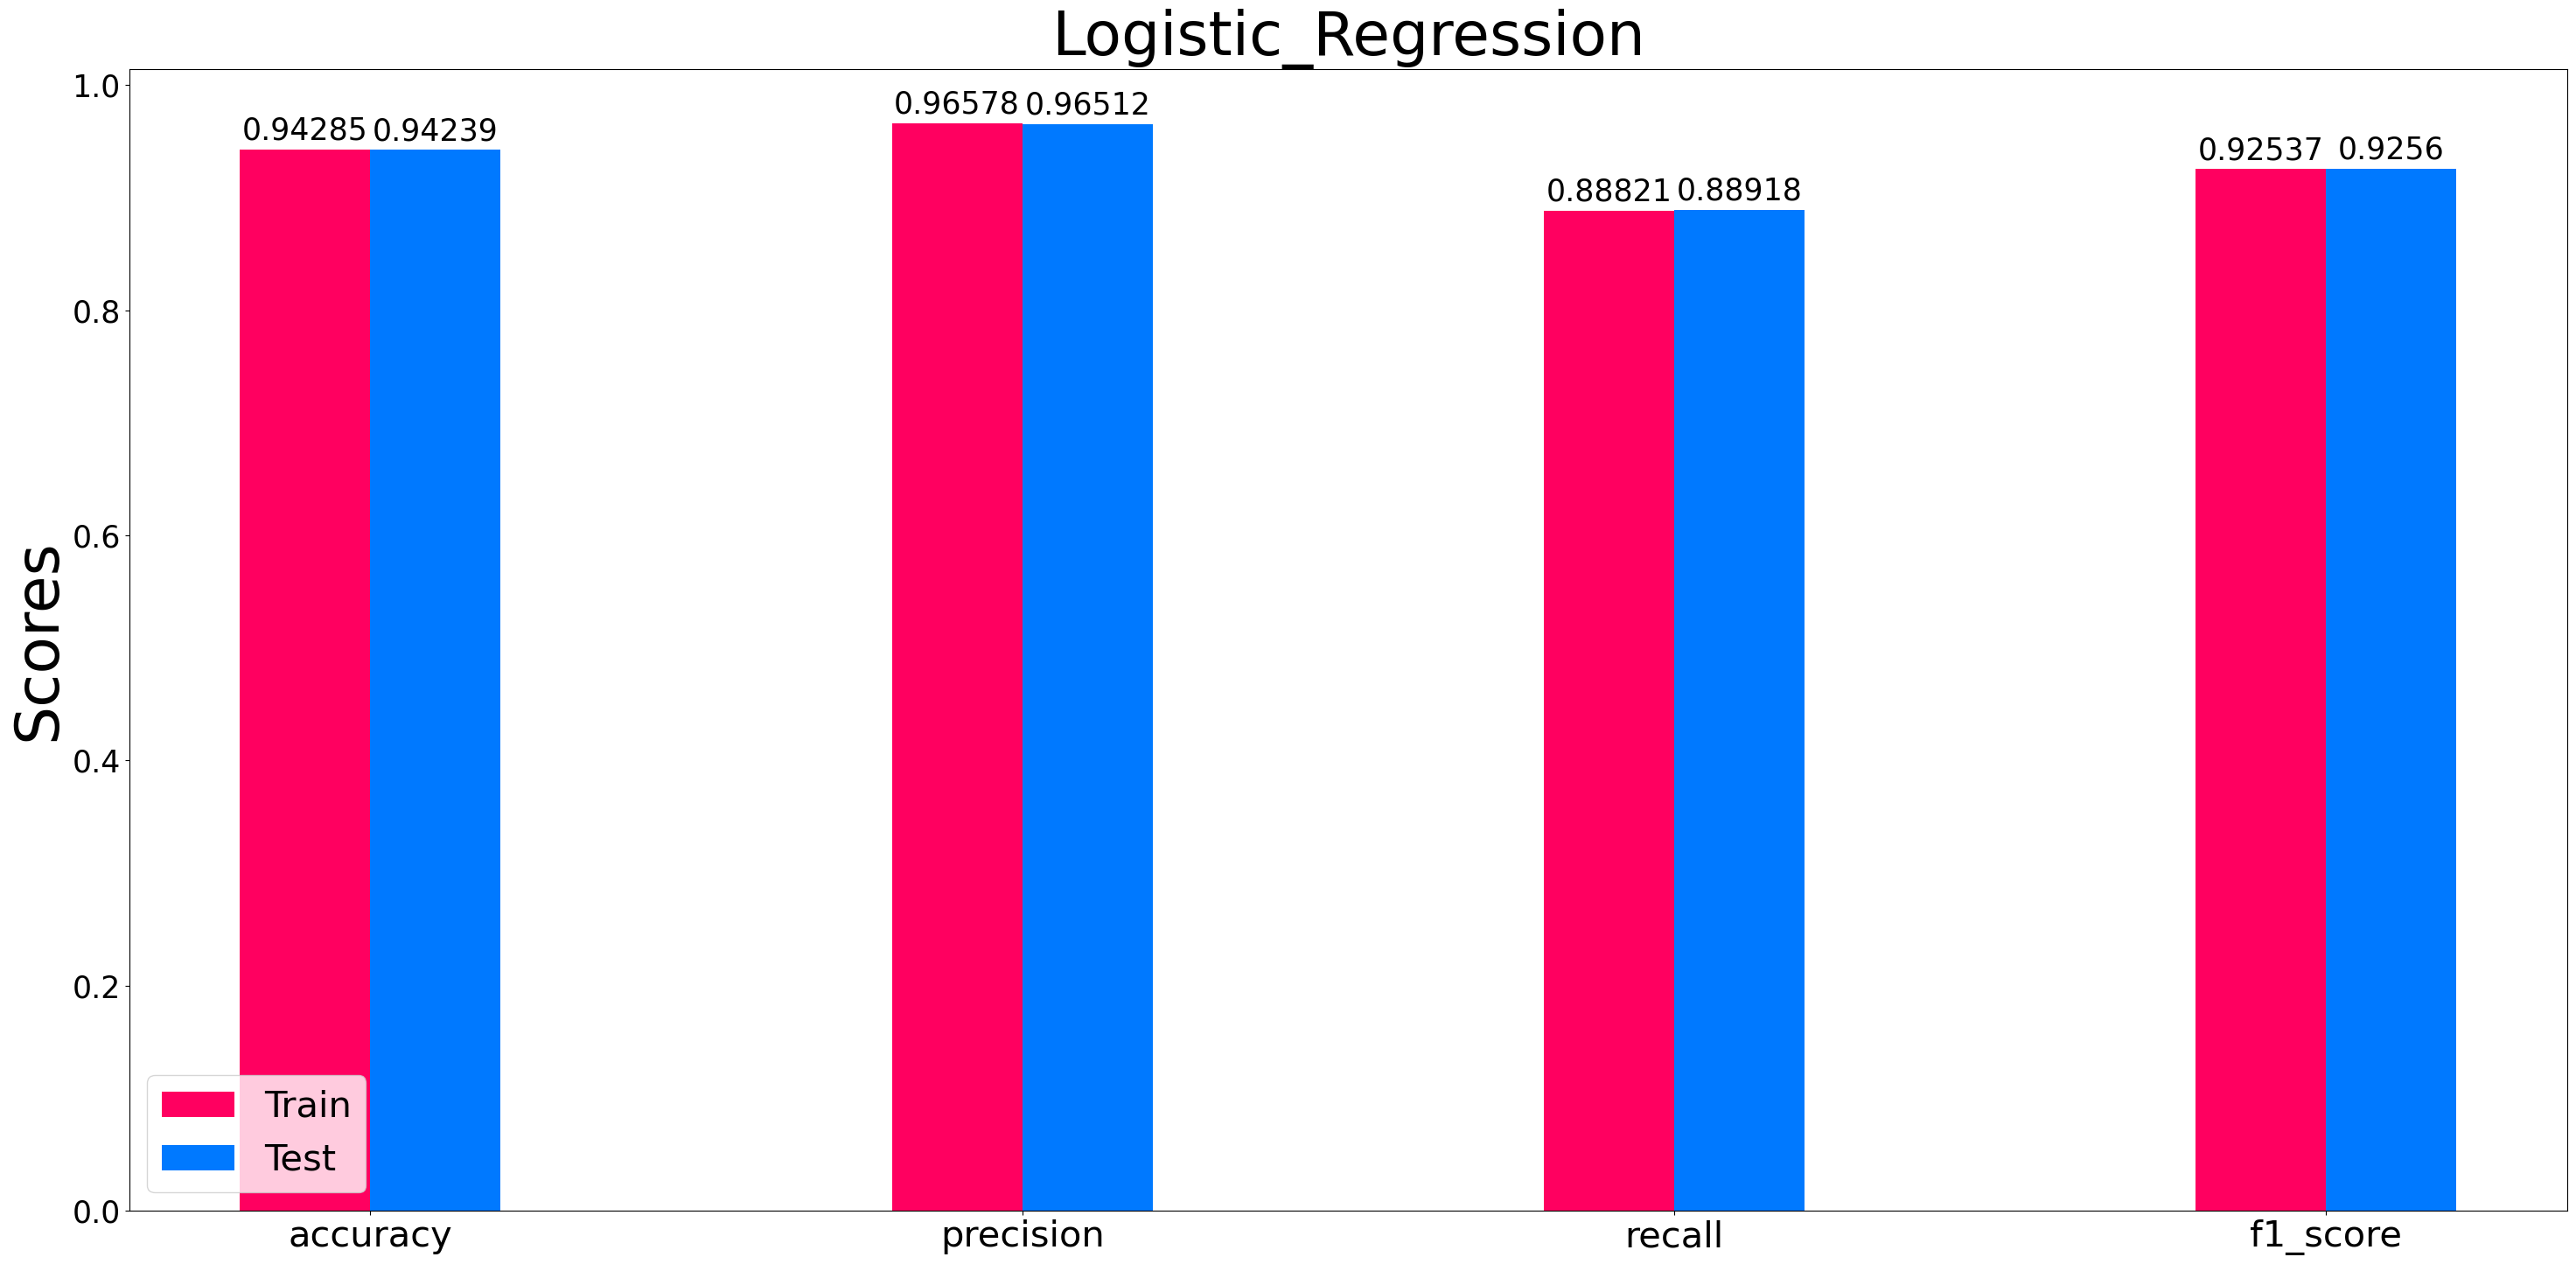

In [139]:
LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
plotplot(category,LR_train,LR_test,'Logistic_Regression','#FF0060' ,'#0079FF')

## KNN

In [140]:
knn_clf = KNN(X_scale_train, y_train) #Create a K-Nearest Neighbors classifier

Best K is: 3 



In [141]:
knn_y_pred_train = knn_clf.predict(X_scale_train)
#predicts the target values for the training data using the trained KNN classifier.

train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
#Calculates the accuracy score of the KNN model on the training data  &  appends it to the train list.
evo_met(y_train, knn_y_pred_train,'KNN train')
#Generates and displays the confusion matrix for the KNN's performance on the training data.

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,8868,229
Actual Positive,209,5829


In [142]:
knn_y_pred_test = knn_clf.predict(X_scale_test)
#Predicts the target values for the test data using the trained KNN classifier.

test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
#Calculates the accuracy score of the KNN model on the test data and appends it to the test list.

evo_met(y_test, knn_y_pred_test,'KNN test')
#Generates and displays the confusion matrix for the KNN's performance on the test data.

confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,2148,111
Actual Positive,126,1399


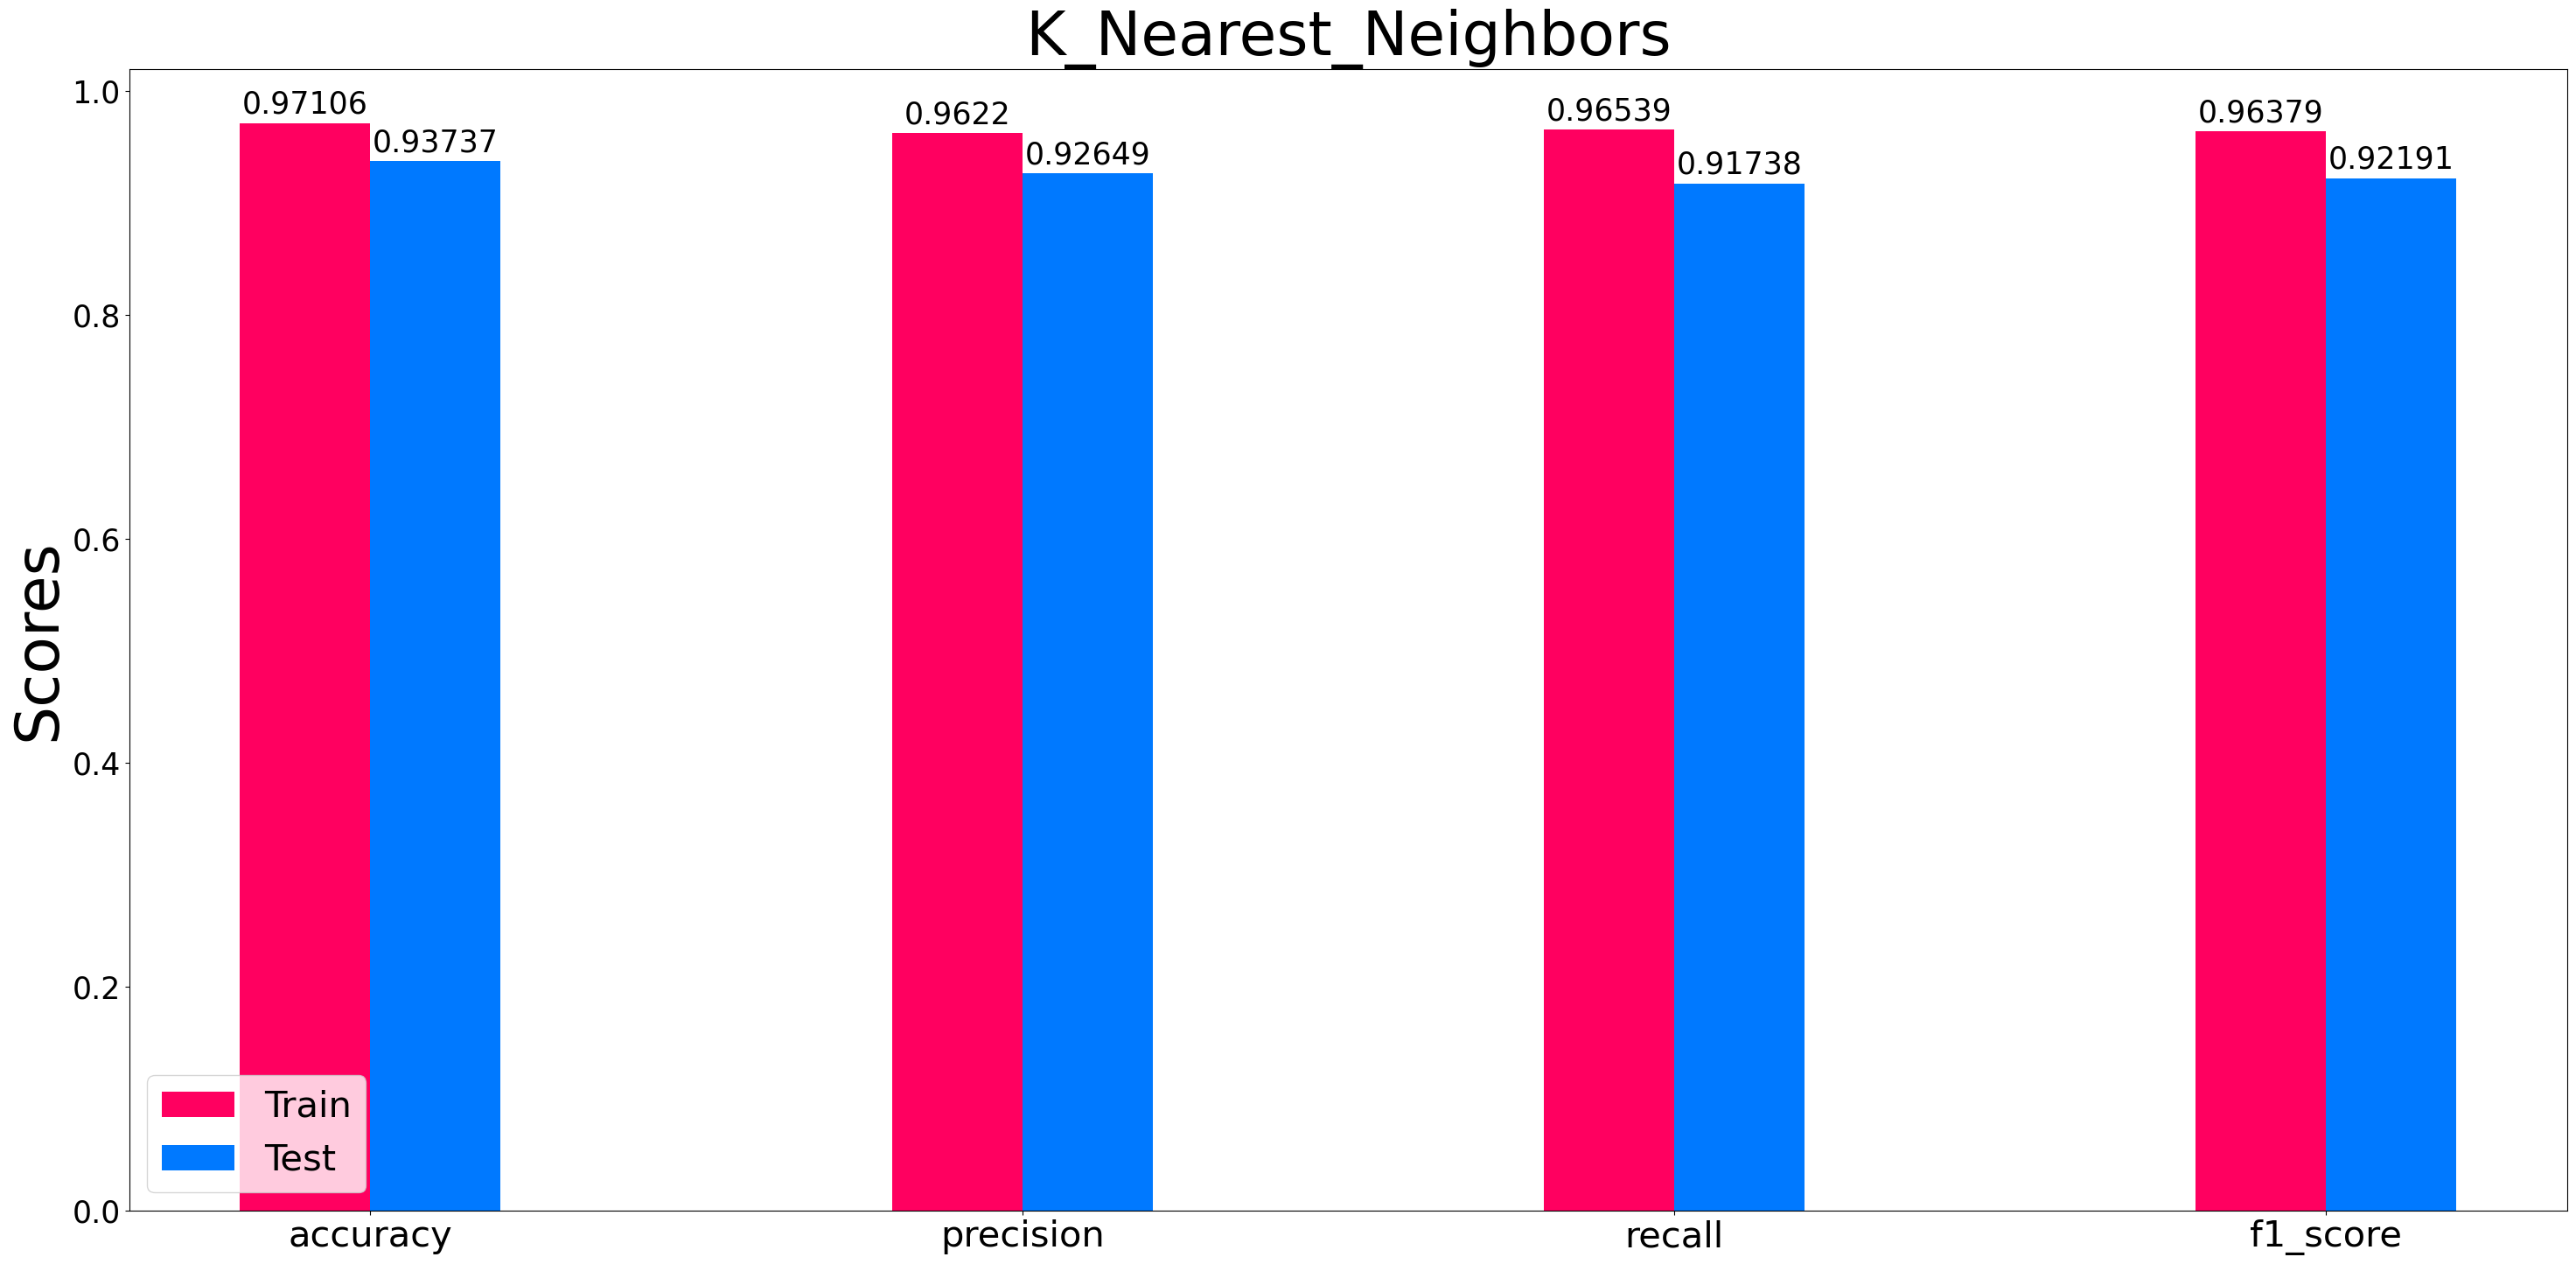

In [143]:
knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
plotplot(category,knn_train,knn_test,'K_Nearest_Neighbors','#FF0060' ,'#0079FF')

## decision_tree

In [144]:
#The decision_tree function takes the scaled training data X_scale_train and
#corresponding labels y_train, and finds the best parameters (max_depth and min_samples_split)
#for the decision tree using grid search. It then trains the decision tree classifier with
#the best parameters.

DT_clf = decision_tree(X_scale_train, y_train)
#Creates a decision tree classifier using the scaled training data.

Best max depth is: 10 

Best min samples split: 5 



### TRAIN

In [145]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
#Predicts the target values for the TRAINING data using the trained DT classifier.

train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
#Calculates the accuracy score of the DT model on the TRAINING data and appends it to the train list.


evo_met(y_train, DT_y_pred_train,'decision tree train')
#Generates and displays the confusion matrix for the DT model's performance on the training data.

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,9025,72
Actual Positive,22,6016


### TEST

In [146]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
#Predicts the target values for the TEST data using the trained decision tree classifier.

test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
#Calculates the accuracy score of the DT model on the TEST data and appends it to the test list.

evo_met(y_test, DT_y_pred_test,'decision tree test')
#Generates and displays the confusion matrix for the DT model's performance on the test data.

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,2223,36
Actual Positive,21,1504


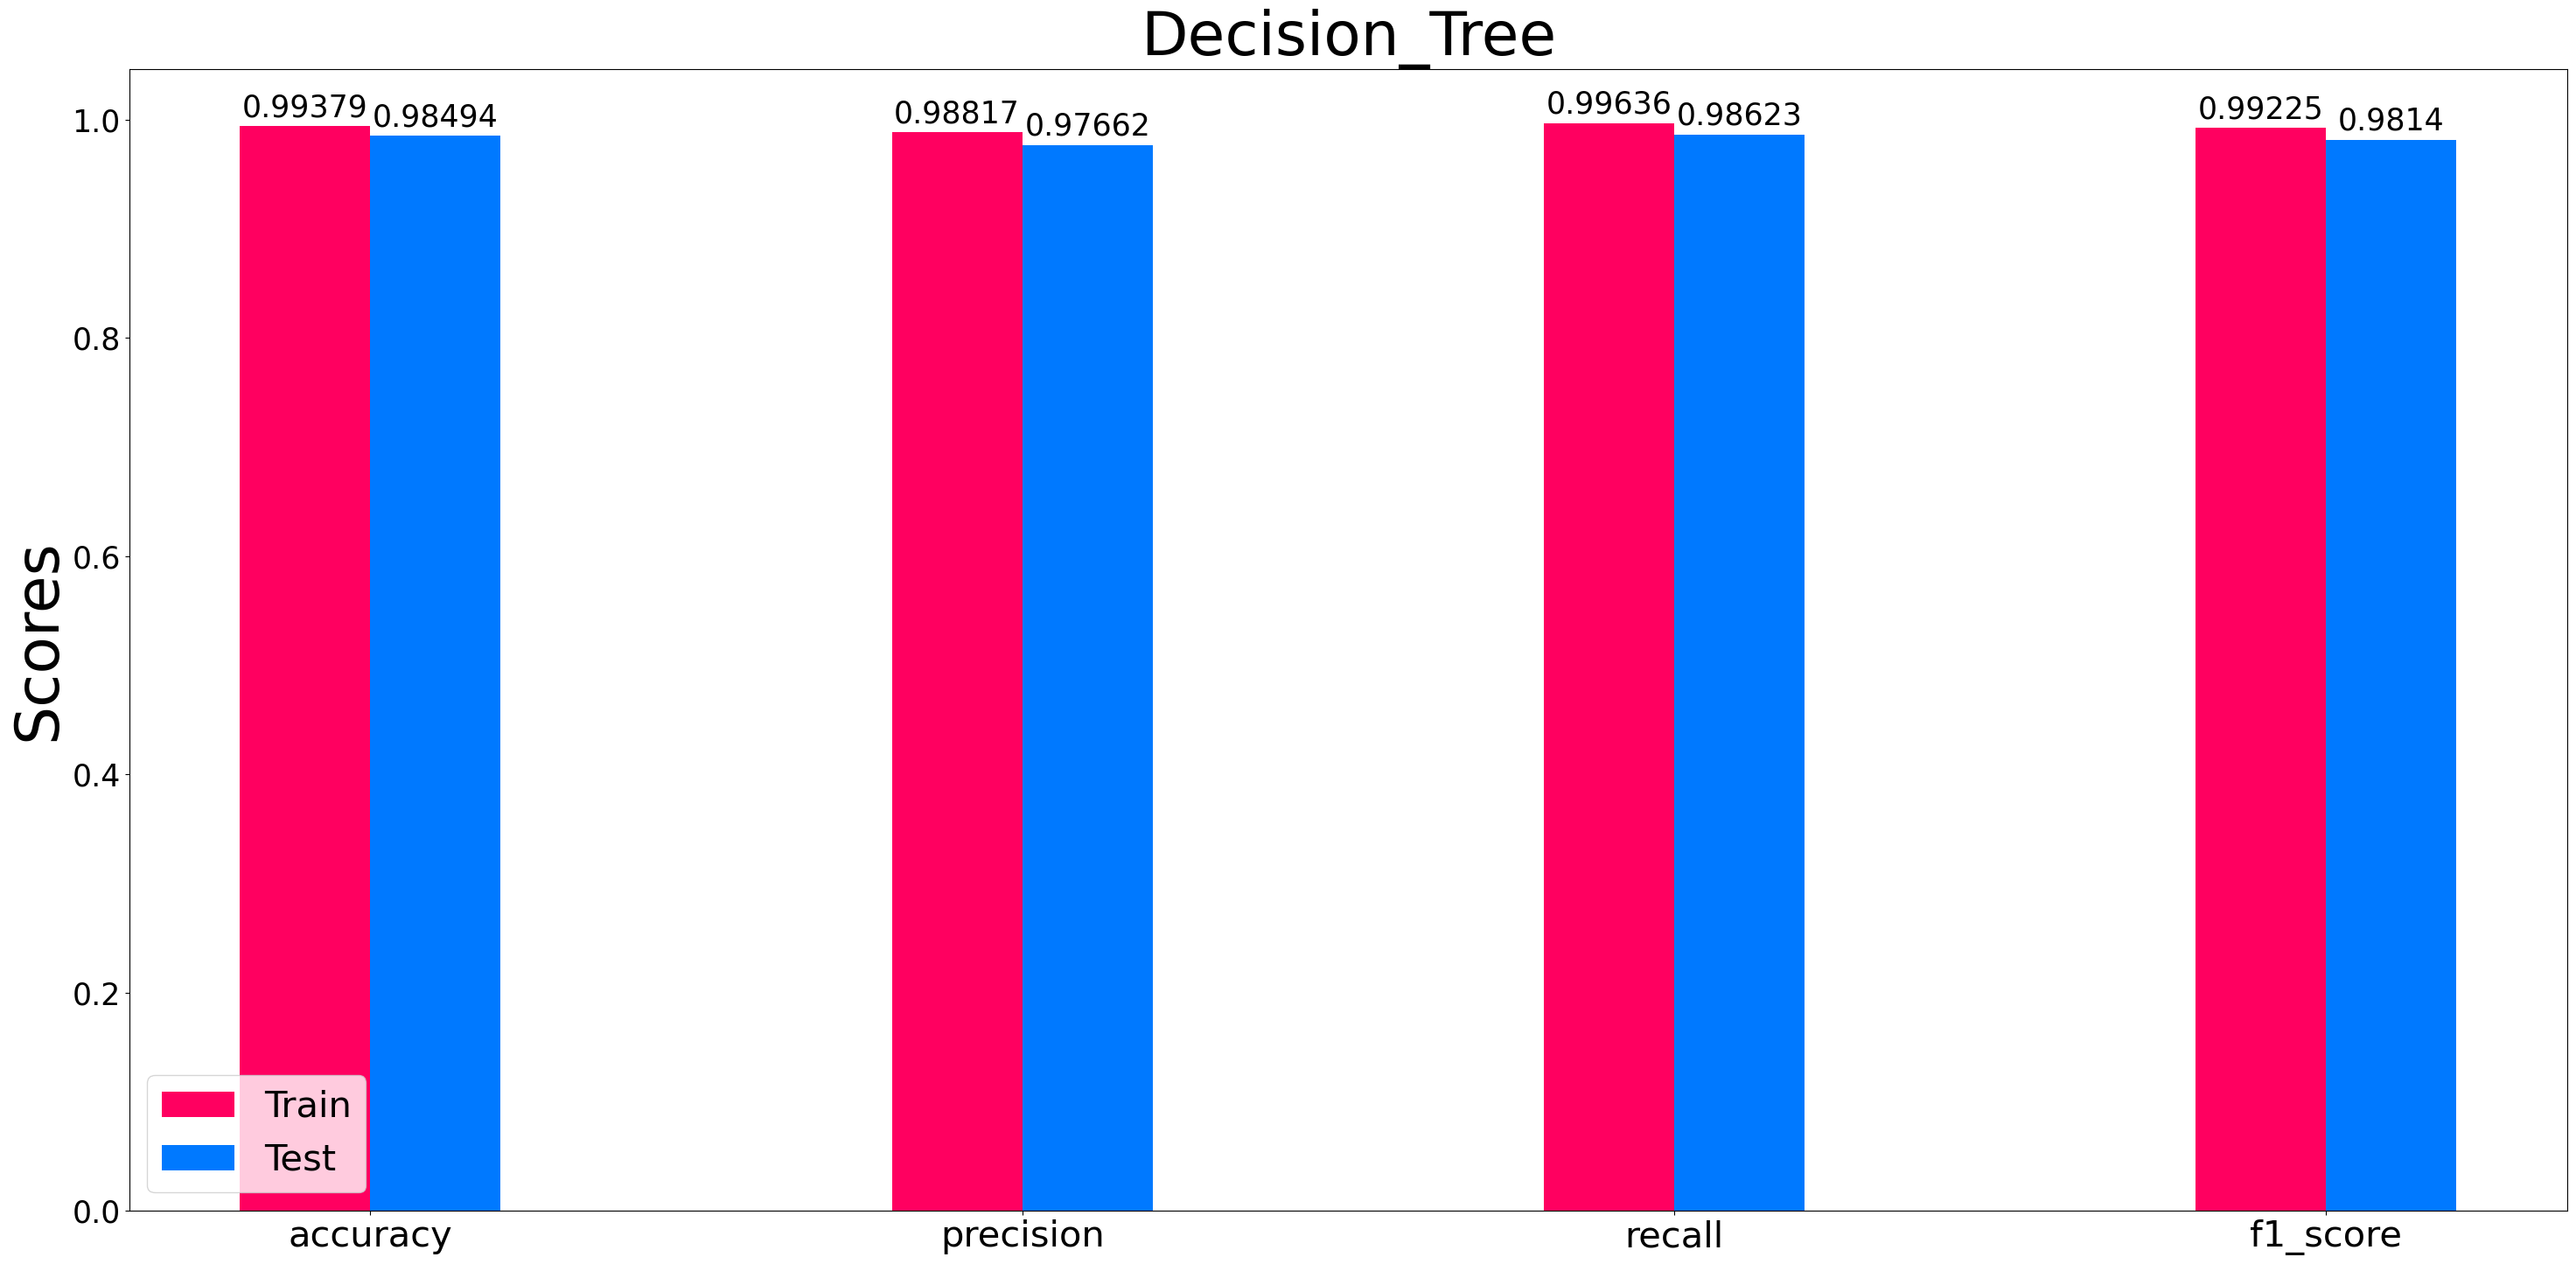

In [147]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Decision_Tree','#FF0060' ,'#0079FF')

##### Compare models by accuracy

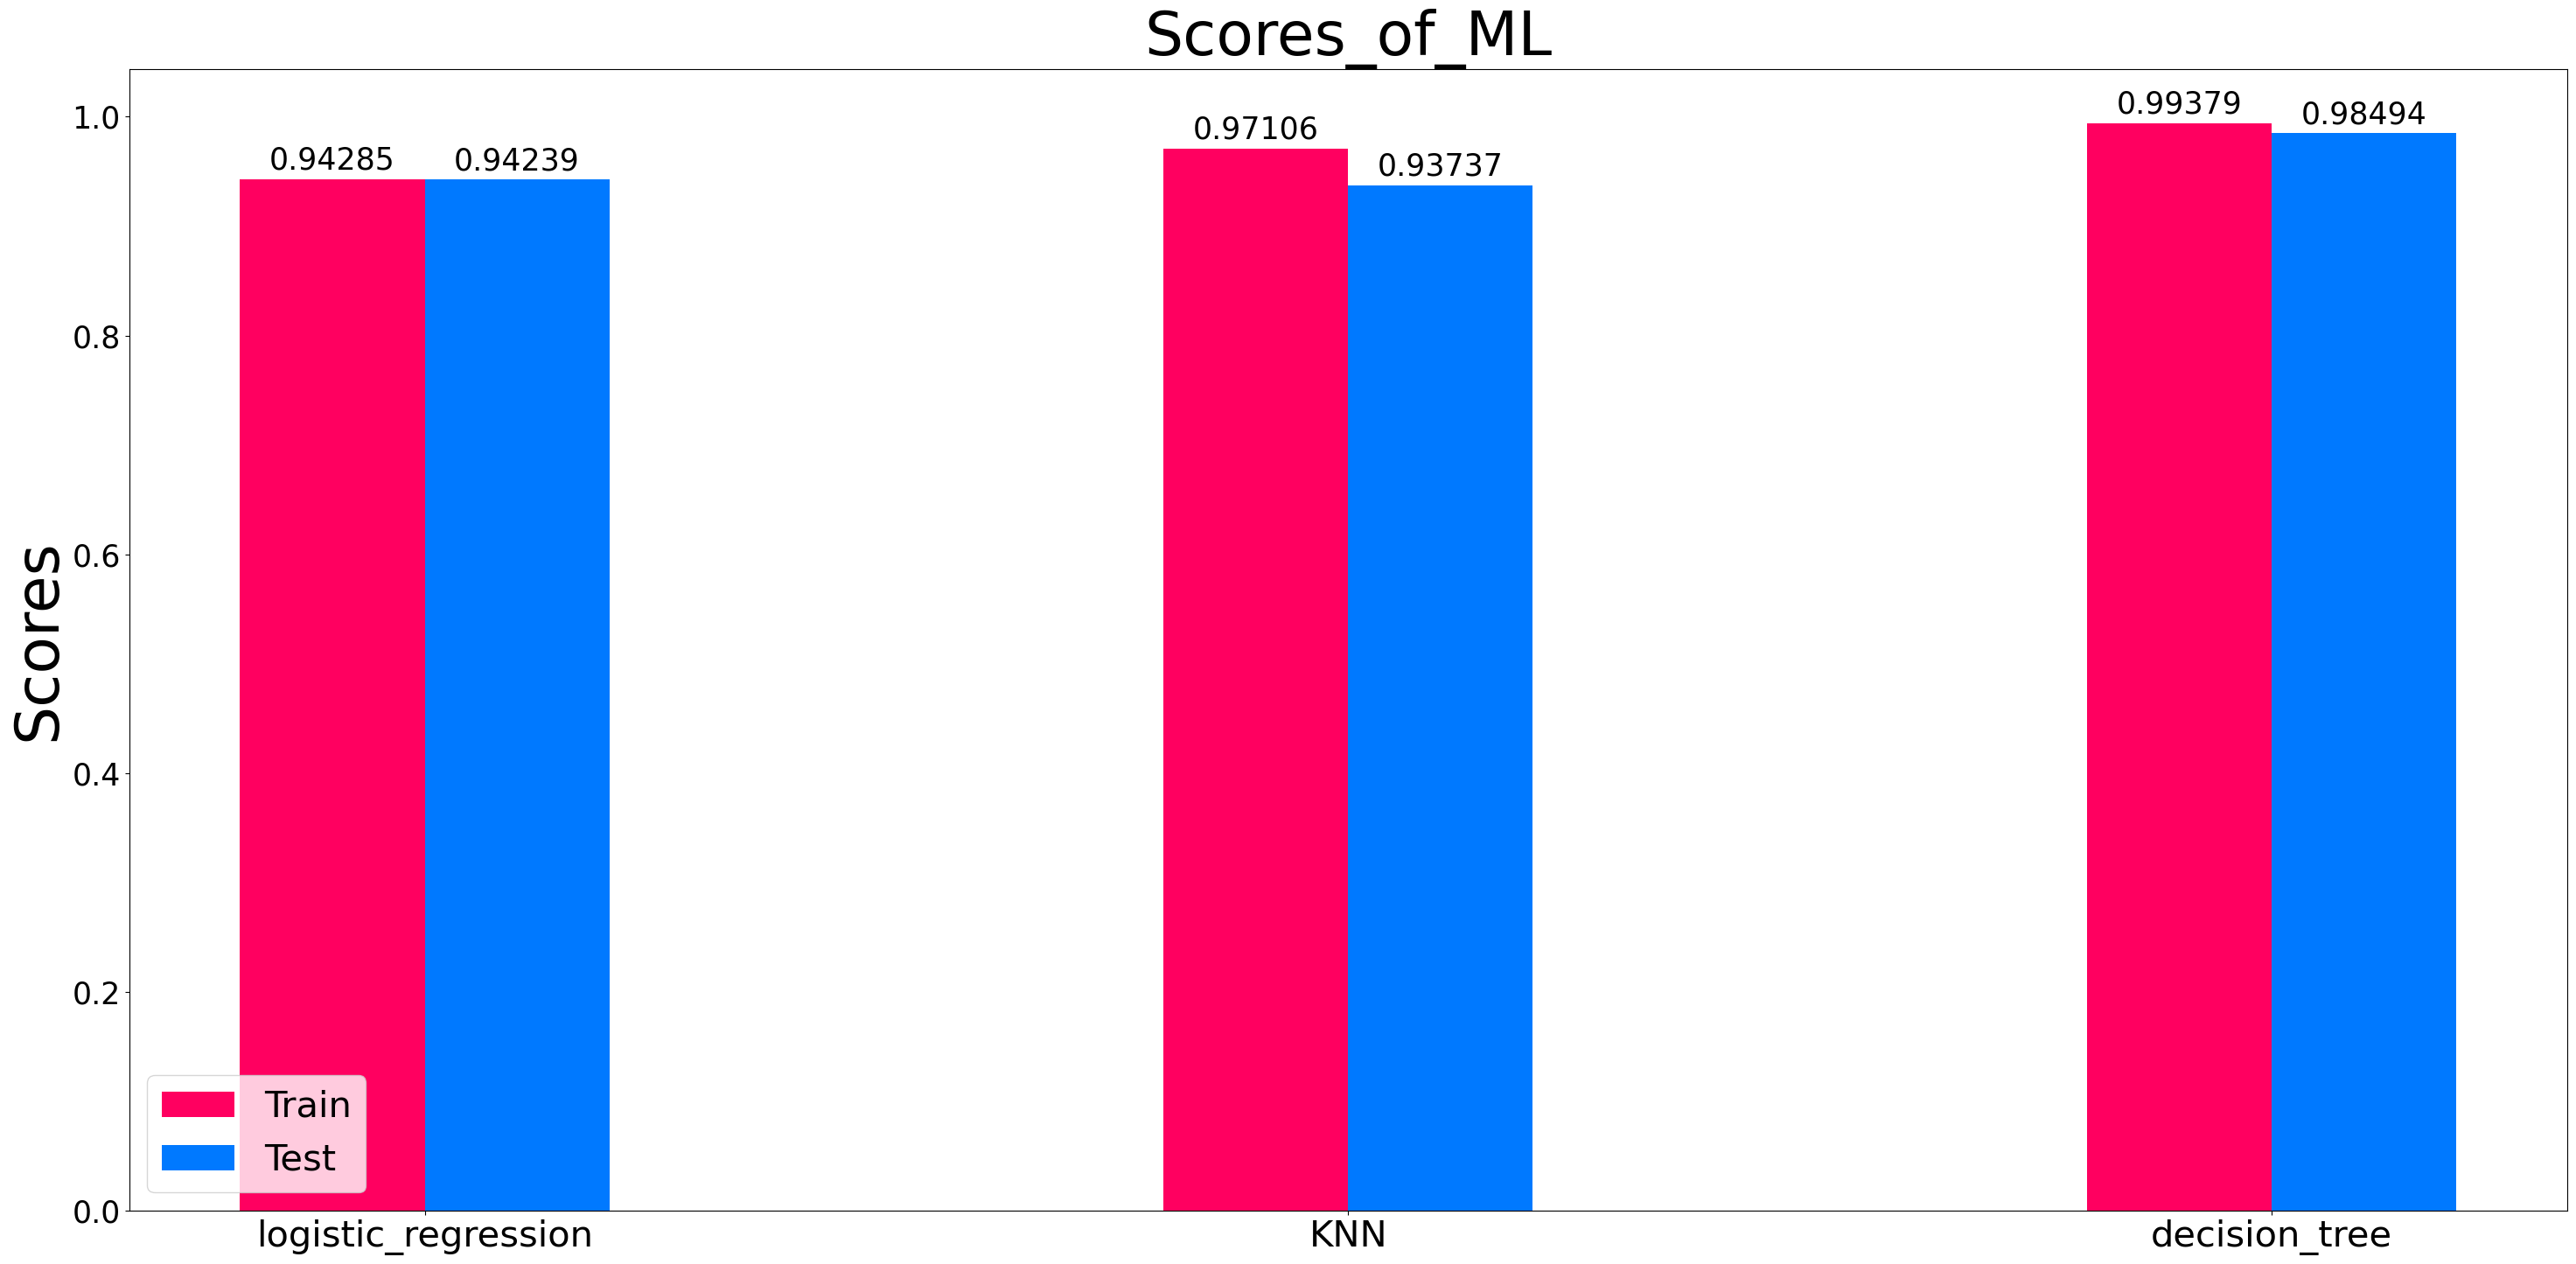

In [148]:
#Plotplot function - used to create a bar plot to visualize the scores     of ML models     on the training and test data.

def plotplot(machine,train,test,name,color1,color2):
    #This function takes in several parameters: machine (list of machine learning model names),
    ##train (list of scores for the training data),
    ##test (list of scores for the test data),
    ##name (title of the plot),
    ##color1 (color for the training data bars), and color2 (color for the test data bars).
    
    font = {'size': 25}
    plt.rc('font', **font)
    #Sets the font properties for the plot using the rc (resource configuration) function of matplotlib.pyplot.
    
    x = np.arange(len(machine))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(30,15)) #configuring bar locations
    #This line creates a figure (fig) and an axes object (ax) for the plot.
    #The figsize parameter sets the size of the figure in inches.
    #In this case, the figure will have a width of 30 inches and a height of 15 inches.
    
    rects1 = ax.bar(x - width/2, train, width, label='Train',color=color1)
    #This line creates the bars for the training data (train) in the plot.
    #The x - width/2 argument specifies the x-coordinates for the left edges of the bars.
    #The train list contains the heights of the bars.
    #The width parameter determines the width of the bars.
    #The label parameter sets the legend label for the bars as "Train".
    #The color parameter sets the color of the bars to color1.
    
    rects2 = ax.bar(x + width/2, test, width, label='Test',color=color2)
    #This line creates the bars for the test data (test) in the plot.
    #The x + width/2 argument specifies the x-coordinates for the left edges of the bars.
    #The test list contains the heights of the bars.
    #The width parameter = width of the bars.
    #The label parameter sets the legend label for the bars as "Test".
    #The color parameter sets the color of the bars to color2.
    

    # Add text for labels, title, font size and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores',fontsize=50)
    ax.set_title(name,fontsize=50)
    ax.set_xticks(x)
    ax.set_xticklabels(machine,fontsize=30)
    ax.legend(fontsize=30,loc="lower left")


    def autolabel(rects): #פונקציית יצירת מלבנים
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height), #add text label above each bar
                        xy=(rect.get_x() + rect.get_width() / 2, height), #place in middle of bar
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points", # name of the coordinate system
                        ha='center', va='bottom') #Vertical and horizontal alignments


            
            
        
    autolabel(rects1)
    autolabel(rects2)
    #Adds text labels to the bars representing the train and test scores.
    
    fig.tight_layout() #Improve the spacing within the plot
    plt.show()
    
    
plotplot(machine,train,test,'Scores_of_ML','#FF0060' ,'#0079FF')

#### Based on the provided information, the Decision Tree model is the best choice due to its high accuracy, good generalization, and balanced performance on both the training and testing datasets, thus we will continue with said model.

## EU Model

In [149]:
df_ml_eu = df.copy()
df_ml_eu.drop(['na_sucsses','japan_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_eu

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,eu_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,1
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,1
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,0
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0


In [150]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_eu,'eu_sucsses')
#This line calls the split_train_and_test function, passing in the DataFrame df_ml_eu
#and the target column name 'eu_success'.

#It assigns the returned values (X_train, X_test, y_train, y_test) to the respective variables.

In [151]:
scaler = StandardScaler()
#Creates an instance of the StandardScaler class, which will be used to scale the data

X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [152]:
# Lists
#The lines declare and initialize 3 lists: category, train, and test.
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [153]:
DT_clf = decision_tree(X_scale_train, y_train)
#Creates a DT classifier using the scaled training data.

Best max depth is: 10 

Best min samples split: 5 



## TRAIN

In [154]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
#Predicts the target values for the TRAINING data using the trained DT classifier.

train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
#Calculates the accuracy score of the DT model on the TRAINING data and appends it to the train list.

evo_met(y_train, DT_y_pred_train,'decision tree train')
#Generates and displays the confusion matrix for the DT model's performance on the training data.

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,14262,28
Actual Positive,53,792


## TEST

In [155]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
#Predicts the target values for the TEST data using the trained decision tree classifier.

test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
#Calculates the accuracy score of the DT model on the TEST data and appends it to the test list.

evo_met(y_test, DT_y_pred_test,'decision tree test')
#Generates and displays the confusion matrix for the DT model's performance on the test data.

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,3567,18
Actual Positive,30,169


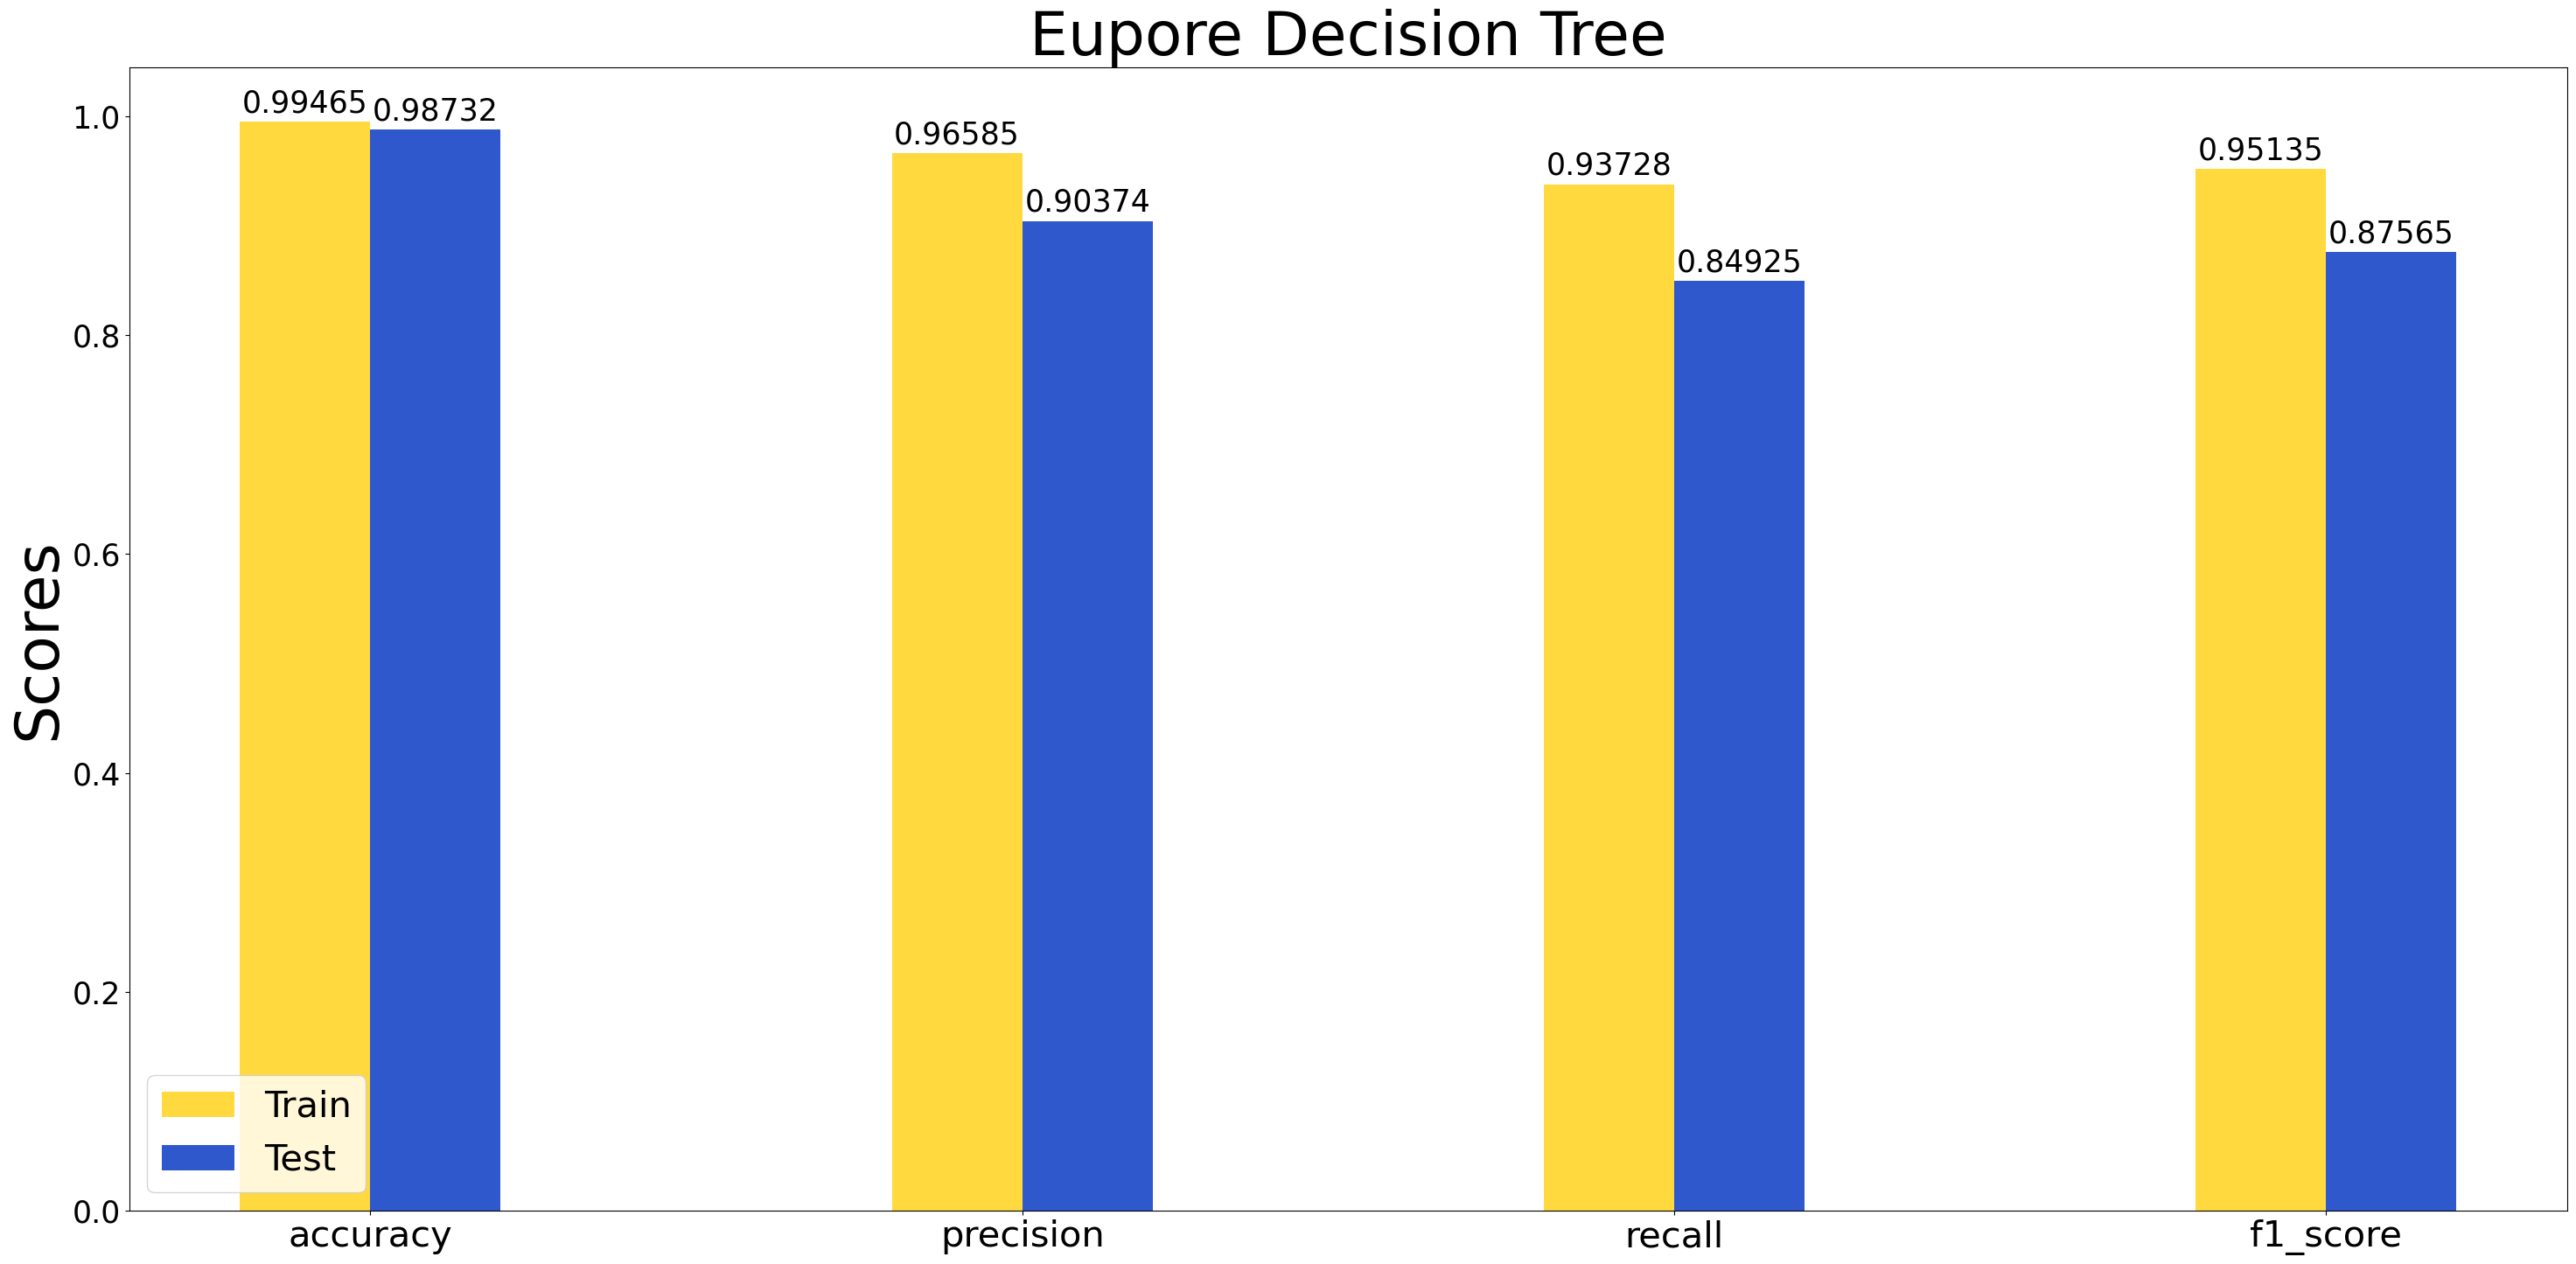

In [156]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test, 'Eupore Decision Tree', '#FFD93D' , '#2F58CD')

## Japan Model

In [157]:
df_ml_jp = df.copy()
df_ml_jp.drop(['na_sucsses','eu_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_jp

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,japan_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,0
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0


In [158]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_jp,'japan_sucsses')
#This line calls the split_train_and_test function, passing in the DataFrame df_ml_jp
#and the target column name 'jp_success'.

#It assigns the returned values (X_train, X_test, y_train, y_test) to the respective variables.

In [159]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [160]:
# Lists
#The lines declare and initialize 3 lists: category, train, and test
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [161]:
DT_clf = decision_tree(X_scale_train, y_train)
#Creates a DT classifier using the scaled training data.

Best max depth is: 10 

Best min samples split: 5 



## TRAIN

In [162]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
#Predicts the target values for the TRAINING data using the trained DT classifier.


train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
#Calculates the accuracy score of the DT model on the TRAINING data and appends it to the train list.


evo_met(y_train, DT_y_pred_train,'decision tree train')
#Generates and displays the confusion matrix for the DT model's performance on the training data.

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,7746,1
Actual Positive,4,7384


## TEST

In [163]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
#Predicts the target values for the TEST data using the trained decision tree classifier.

test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
#Calculates the accuracy score of the DT model on the TEST data and appends it to the test list.

evo_met(y_test, DT_y_pred_test,'decision tree test')
#Generates and displays the confusion matrix for the DT model's performance on the test data.

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,1906,4
Actual Positive,5,1869


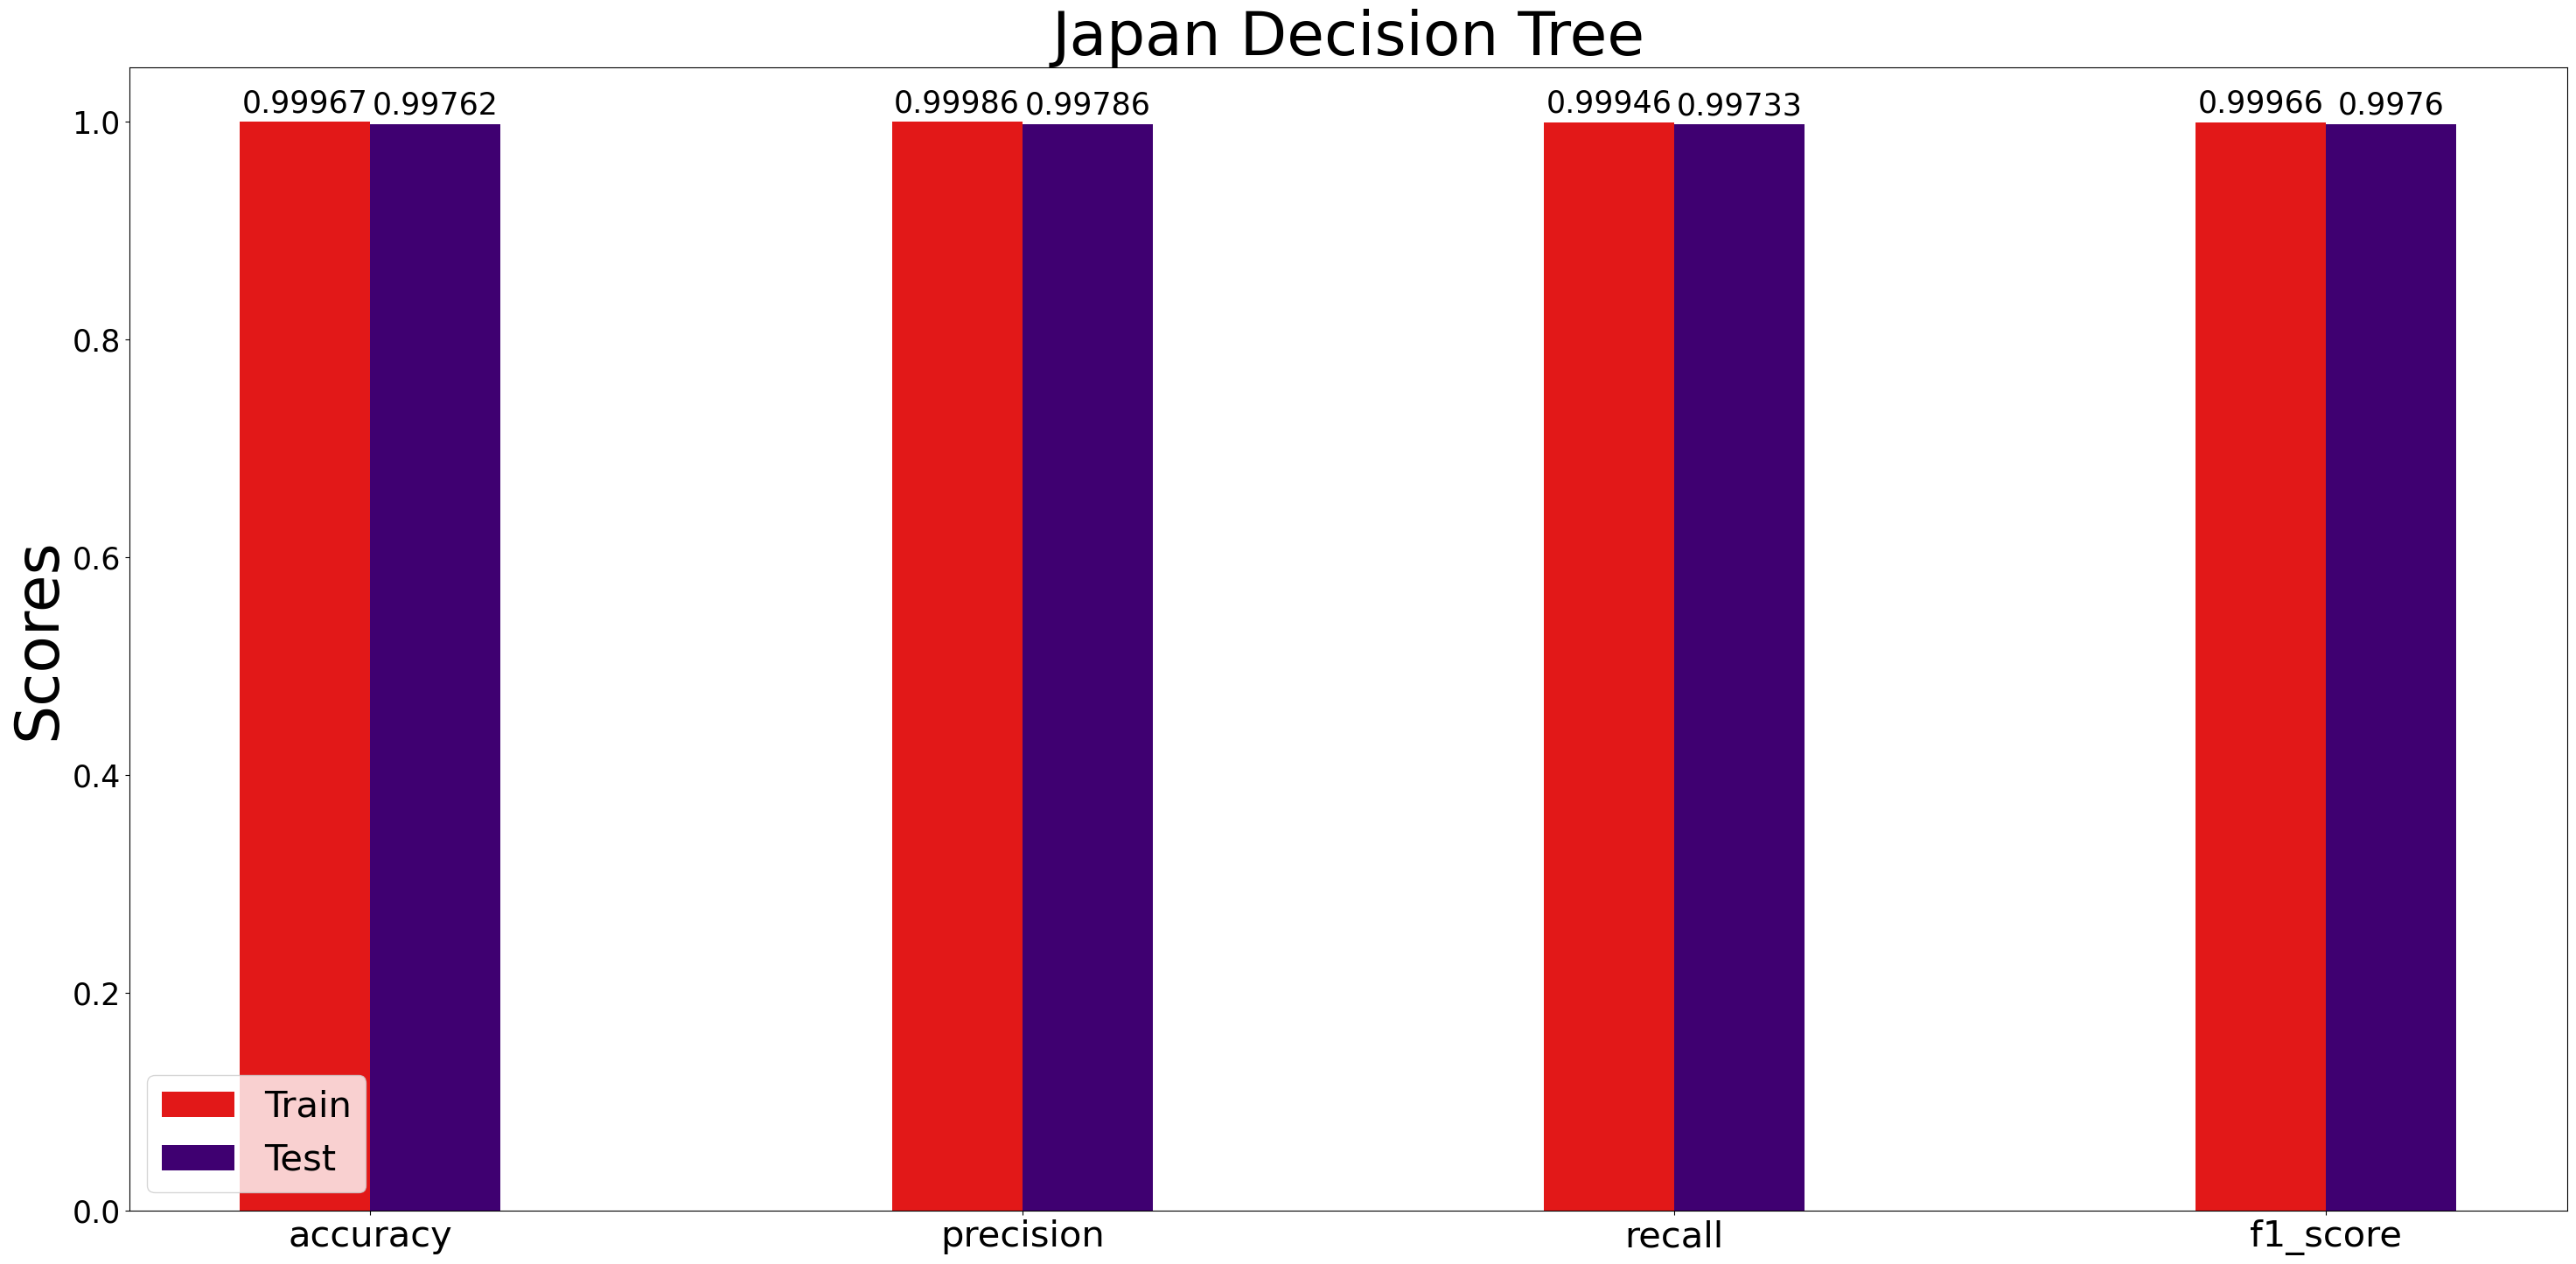

In [164]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Japan Decision Tree','#E21818', '#3F0071')

## Other Model

In [165]:
df_ml_other = df.copy()
df_ml_other.drop(['na_sucsses','eu_sucsses','japan_sucsses'],axis=1, inplace = True)
df_ml_other

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,other_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,0
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,1
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,1
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,1
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,1


In [166]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_other,'other_sucsses')
#This line calls the split_train_and_test function, passing in the DataFrame df_ml_other
#and the target column name 'other_success'.

#It assigns the returned values (X_train, X_test, y_train, y_test) to the respective variables.

In [167]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [168]:
# Lists
#The lines declare and initialize 3 lists: category, train, and test
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [169]:
DT_clf = decision_tree(X_scale_train, y_train)
#Creates a DT classifier using the scaled training data.

Best max depth is: 10 

Best min samples split: 5 



## TRAIN

In [170]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
#Predicts the target values for the TRAINING data using the trained DT classifier.

train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
#Calculates the accuracy score of the DT model on the TRAINING data and appends it to the train list.

evo_met(y_train, DT_y_pred_train,'decision tree train')
#Generates and displays the confusion matrix for the DT model's performance on the training data.

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,14237,34
Actual Positive,28,836


## TEST

In [171]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
#Predicts the target values for the TEST data using the trained decision tree classifier.

test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
#Calculates the accuracy score of the DT model on the TEST data and appends it to the test list.

evo_met(y_test, DT_y_pred_test,'decision tree test')
#Generates and displays the confusion matrix for the DT model's performance on the test data.

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,3577,21
Actual Positive,20,166


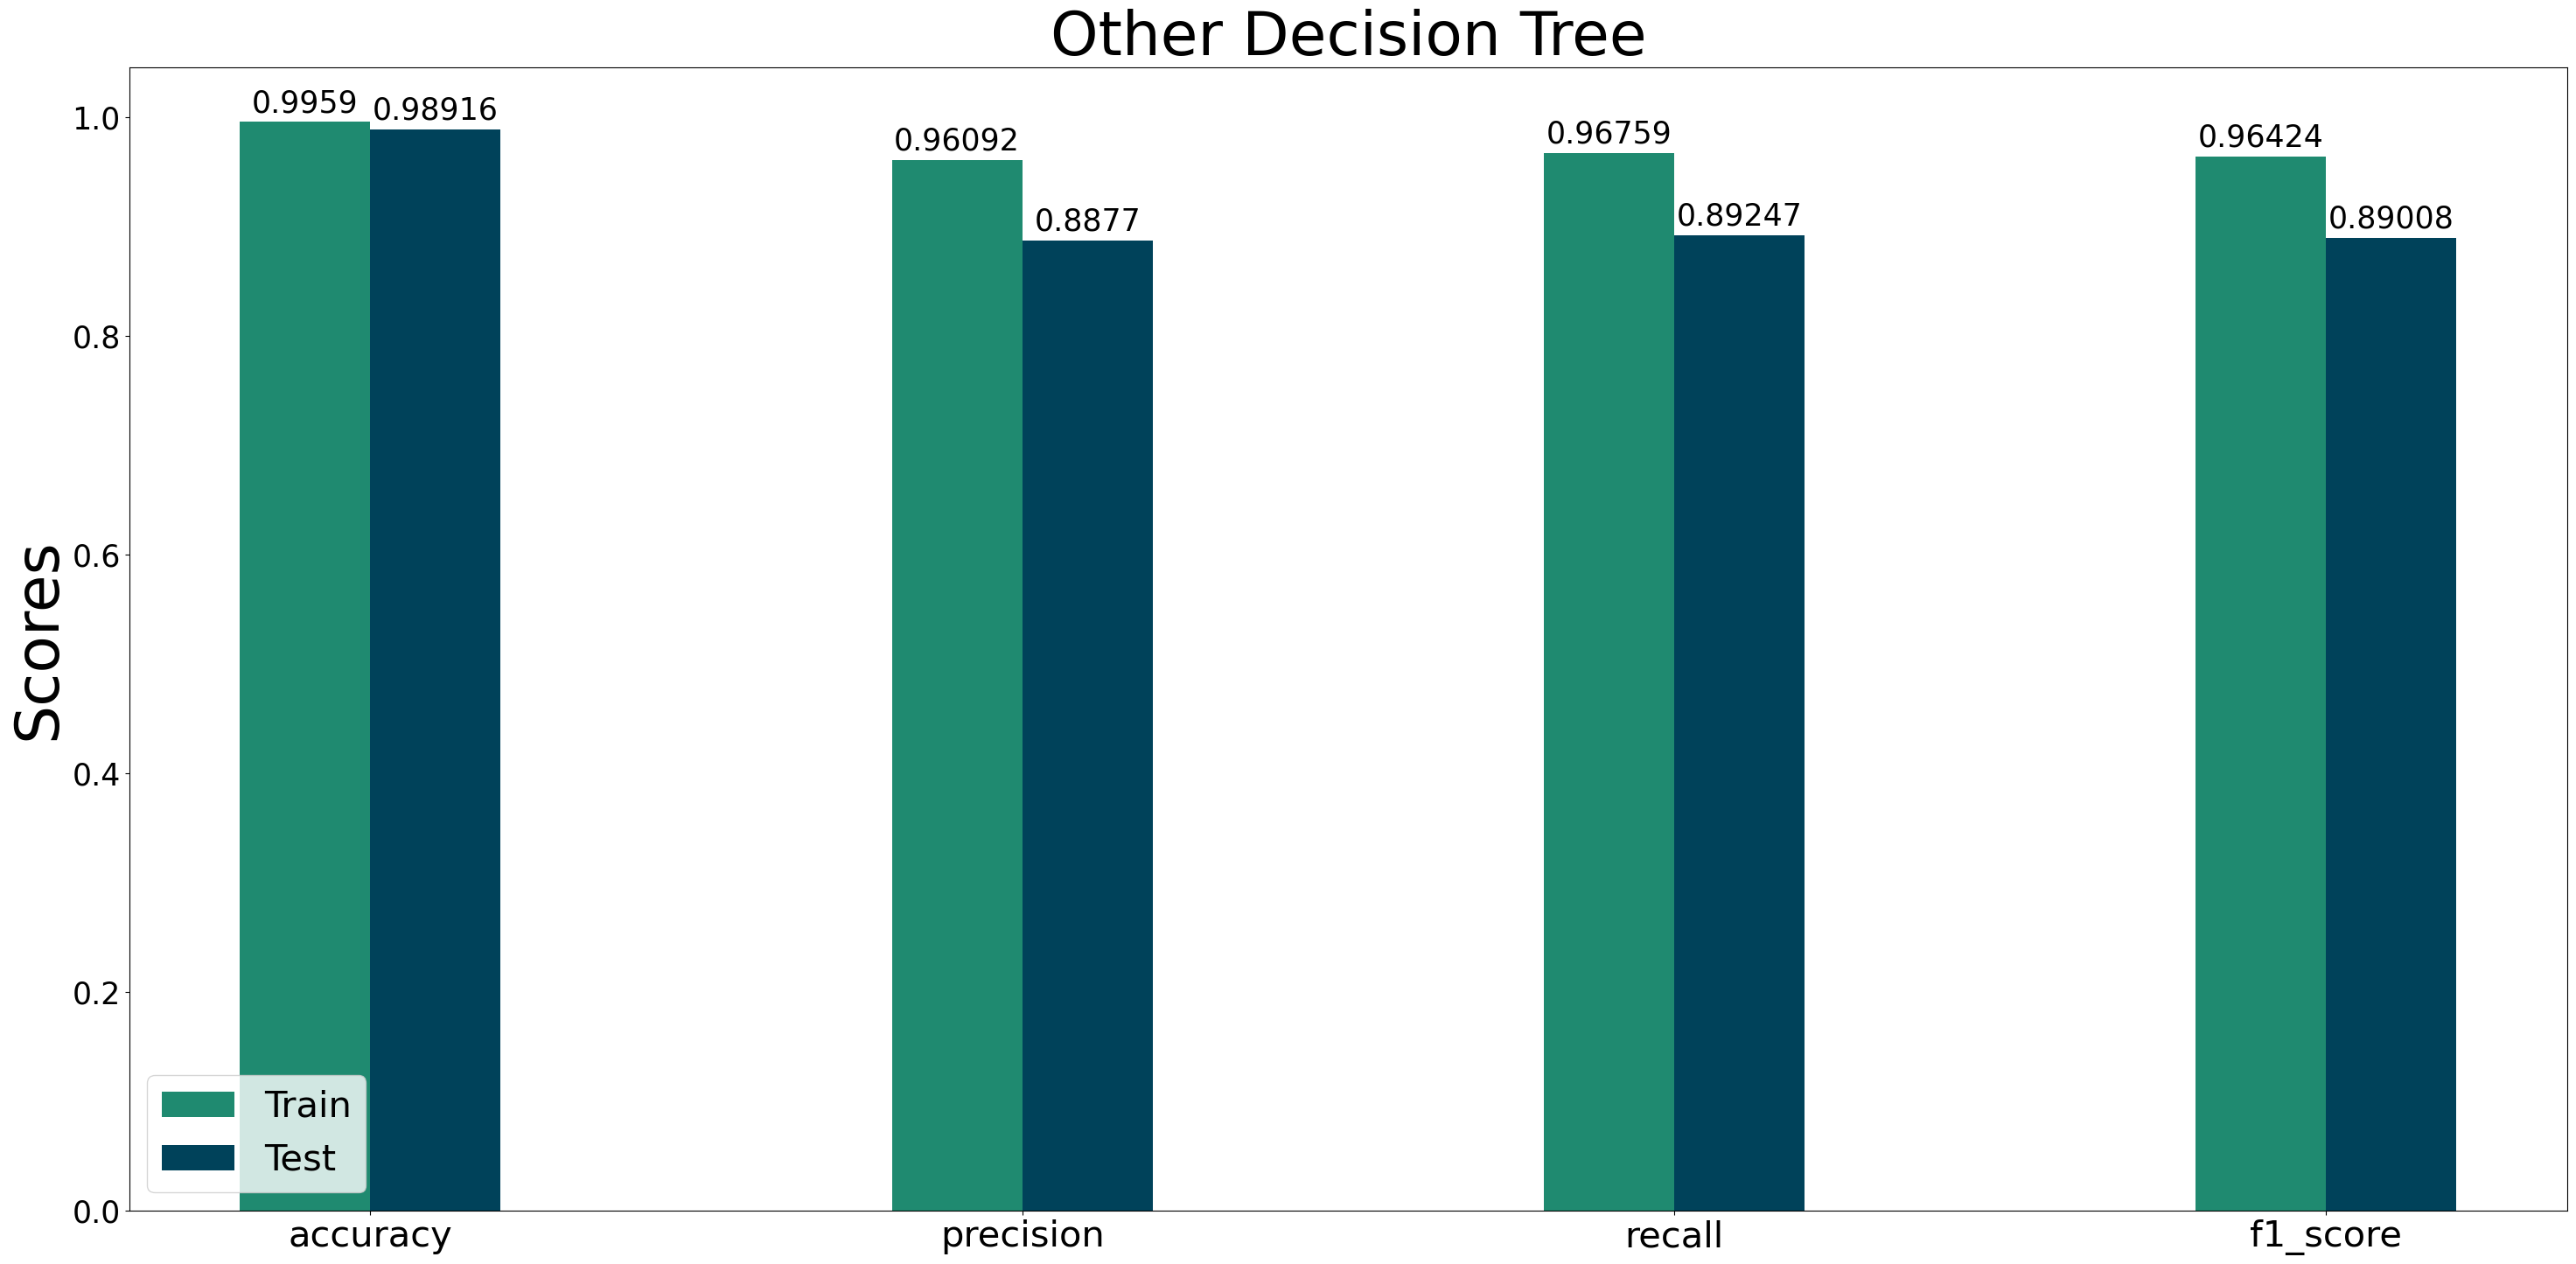

In [172]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Other Decision Tree','#1F8A70', '#00425A')